<div style="text-align: center; color: brown;">
  <h2>Exploration informatique des données décisionnelles</h2>
  <h3 style="color: black;">Projet :Statistique exploratoire multidimensionnelle
 </h3>
  <h3 style="color: blue;"> Selection des variables</h3>
</div>


------------------------------------------------------------------------------------------------------------------------------------------------------

# **<span style="color:green; font-size:24px;">Etape 1 : Exploration des deux Datasets (Visualisation, preprocessing, cleaning)</span>**


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Iris Dataset**

In [138]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# The dataset is stored in the 'data' attribute as a NumPy array
X = iris.data

# The target values (species labels) are stored in the 'target' attribute
y = iris.target

# You can also access feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

# Print some information about the dataset
print("Feature names:", feature_names)
print("Target names:", target_names)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4


### **1.1) Visualisation**

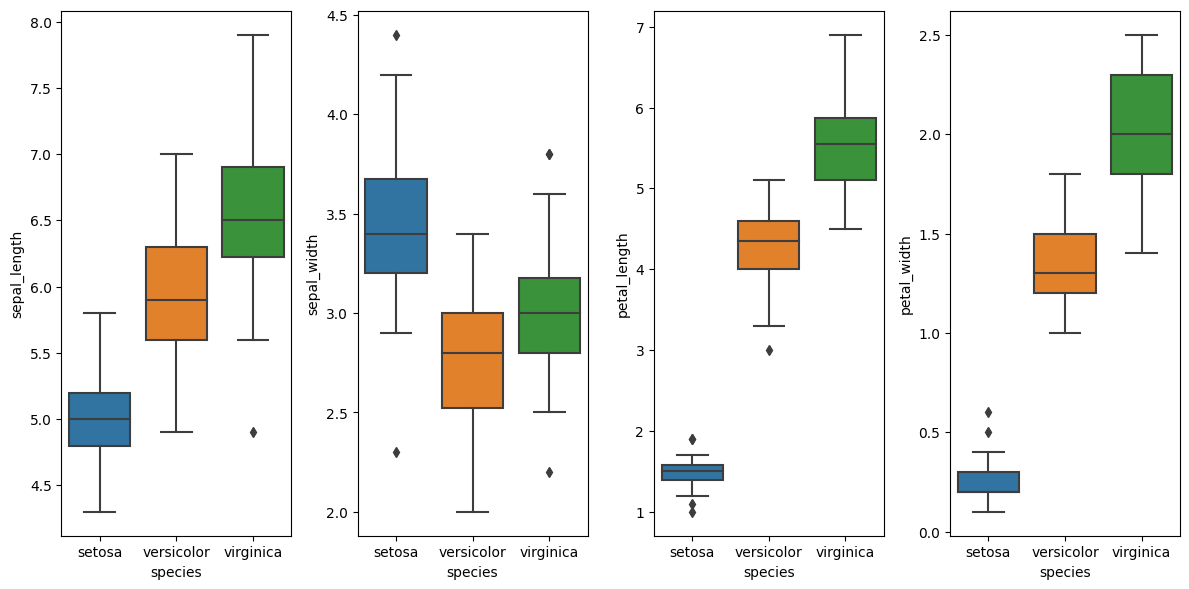

In [139]:
# Créer un DataFrame à partir des données Iris
iris_df = sns.load_dataset('iris')

# Diagrammes en boîte pour chaque caractéristique par classe
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
plt.tight_layout()
plt.show()

#### **a) Histogrammes pour chaque caractéristique par classe**

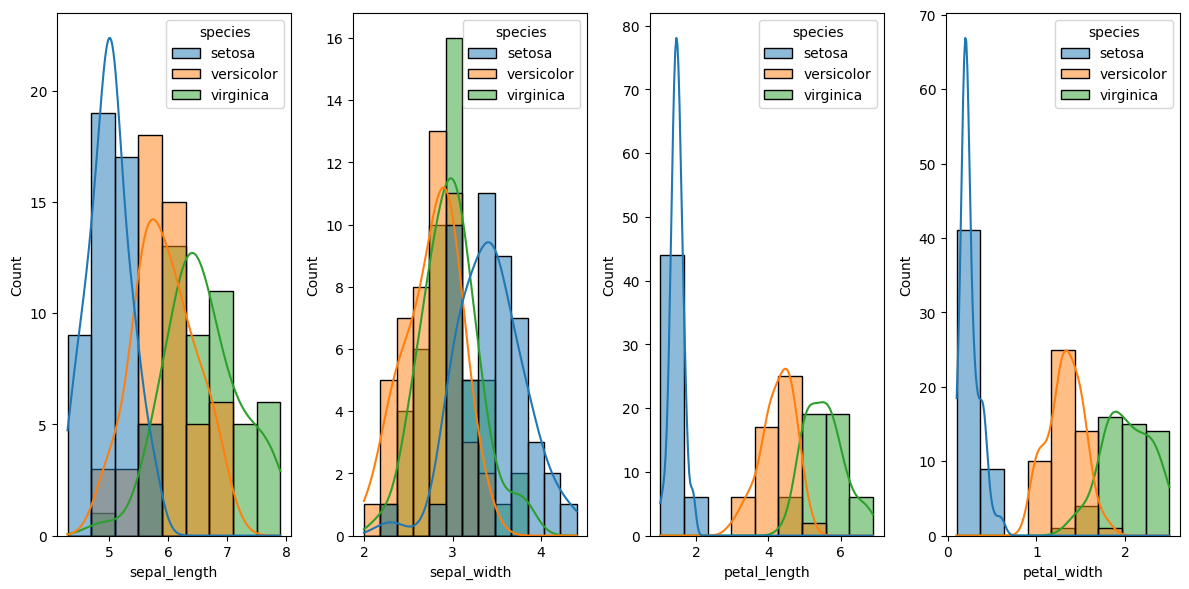

In [140]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True)
plt.tight_layout()
plt.show()

#### **b) Pairplot pour chaque caractéristique par classe**

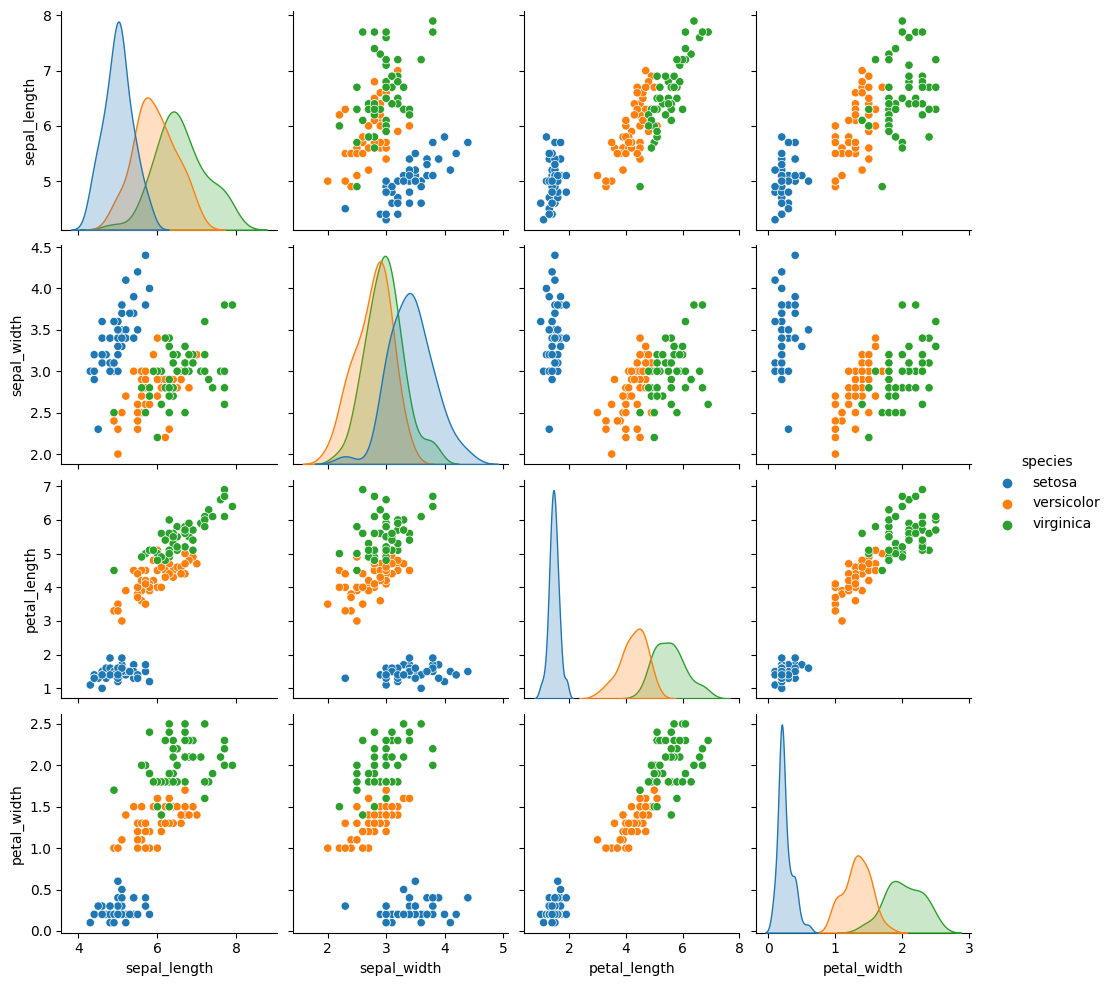

In [141]:
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.show()

#### **c) Matrice de corrélation**

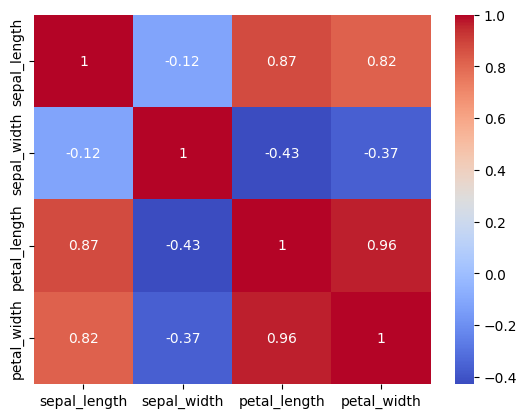

In [142]:
correlation_matrix = iris_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### **d) Diagrammes en violon pour chaque caractéristique par classe**

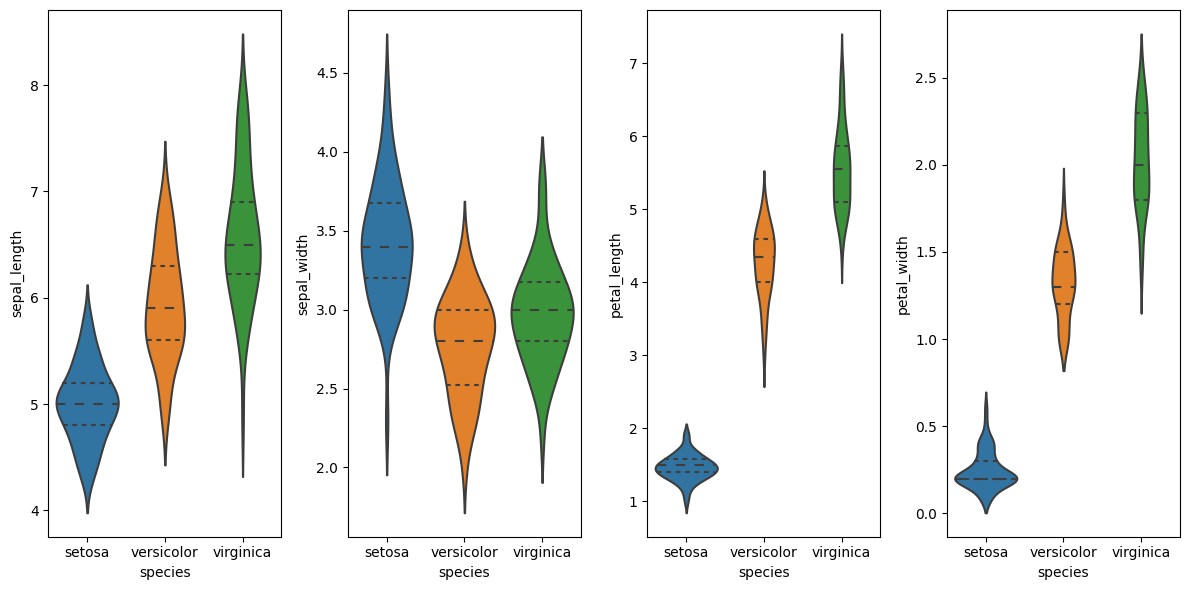

In [143]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.violinplot(x='species', y=feature, data=iris_df, inner='quart')
plt.tight_layout()
plt.show()

####  **e) Diagrammes en nuage de points en 2D**

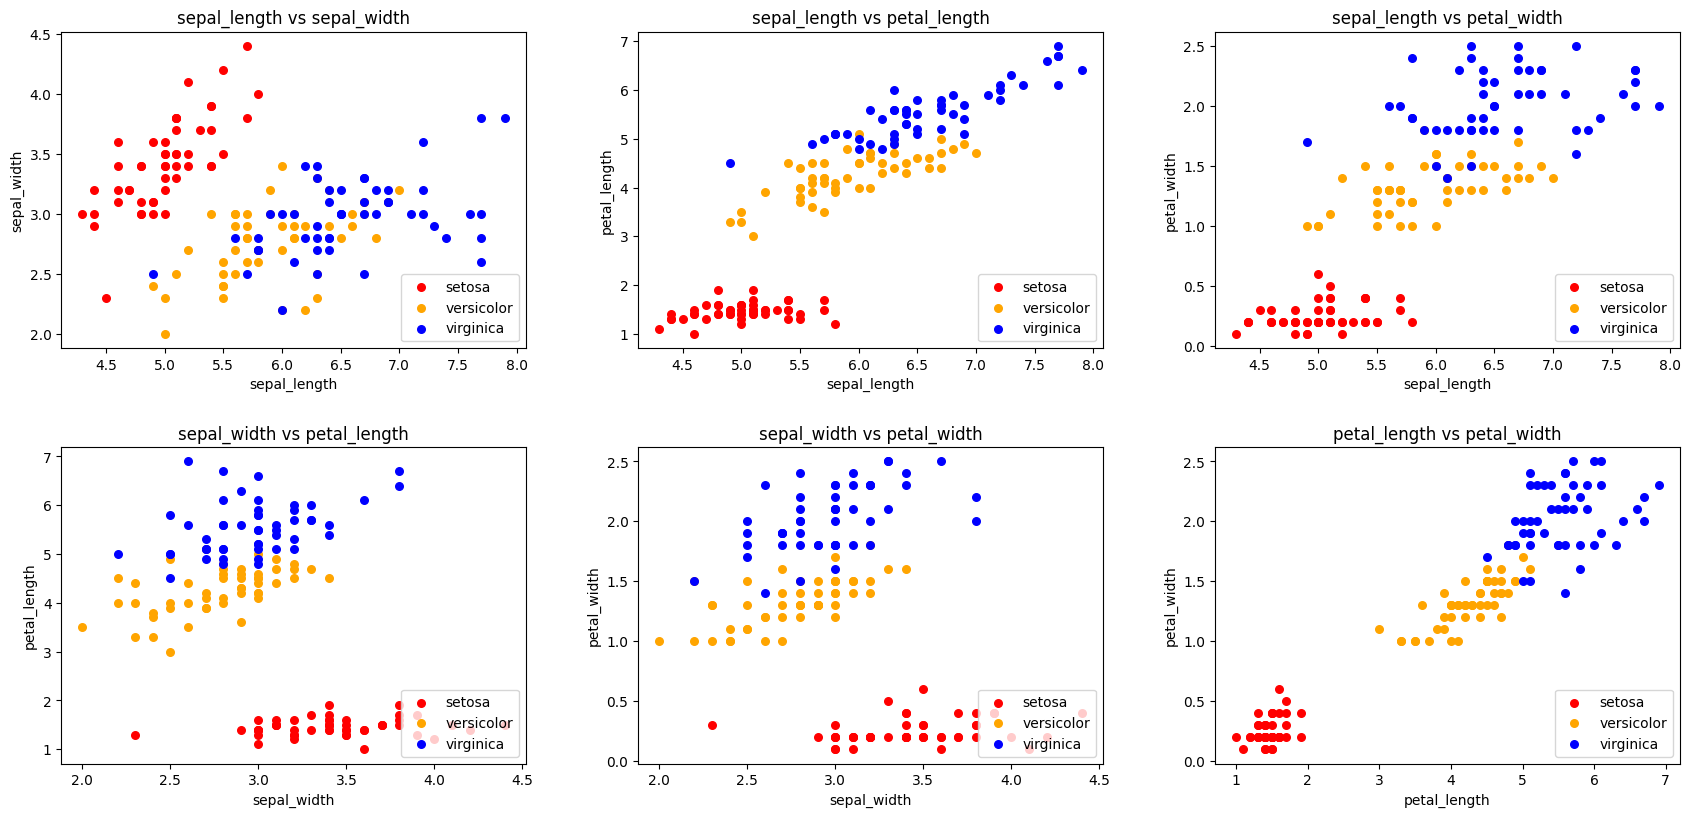

In [144]:
colors = ['red', 'orange', 'blue']
fig, ax = plt.subplots(2, 3, figsize=(18, 9))
fig.tight_layout(pad=5)
ax = ax.ravel()

x=0
for i in range(3):
    for j in range(4):
      if (j>=i+1):
        for y in range(0, 3):
          tmp_df = iris_df[iris_df['species'] == iris.target_names[y]]
          ax[x].scatter(tmp_df.iloc[:,i], tmp_df.iloc[:,j], color=colors[y], s=30, label=iris.target_names[y])

        ax[x].set_xlabel(iris_df.columns[i])
        ax[x].set_ylabel(iris_df.columns[j])
        ax[x].set_title(f"{iris_df.columns[i]} vs {iris_df.columns[j]}")
        ax[x].legend(loc='lower right')

        x=x+1

plt.show()

####  **f) Diagrammes en nuage de points en 3D**

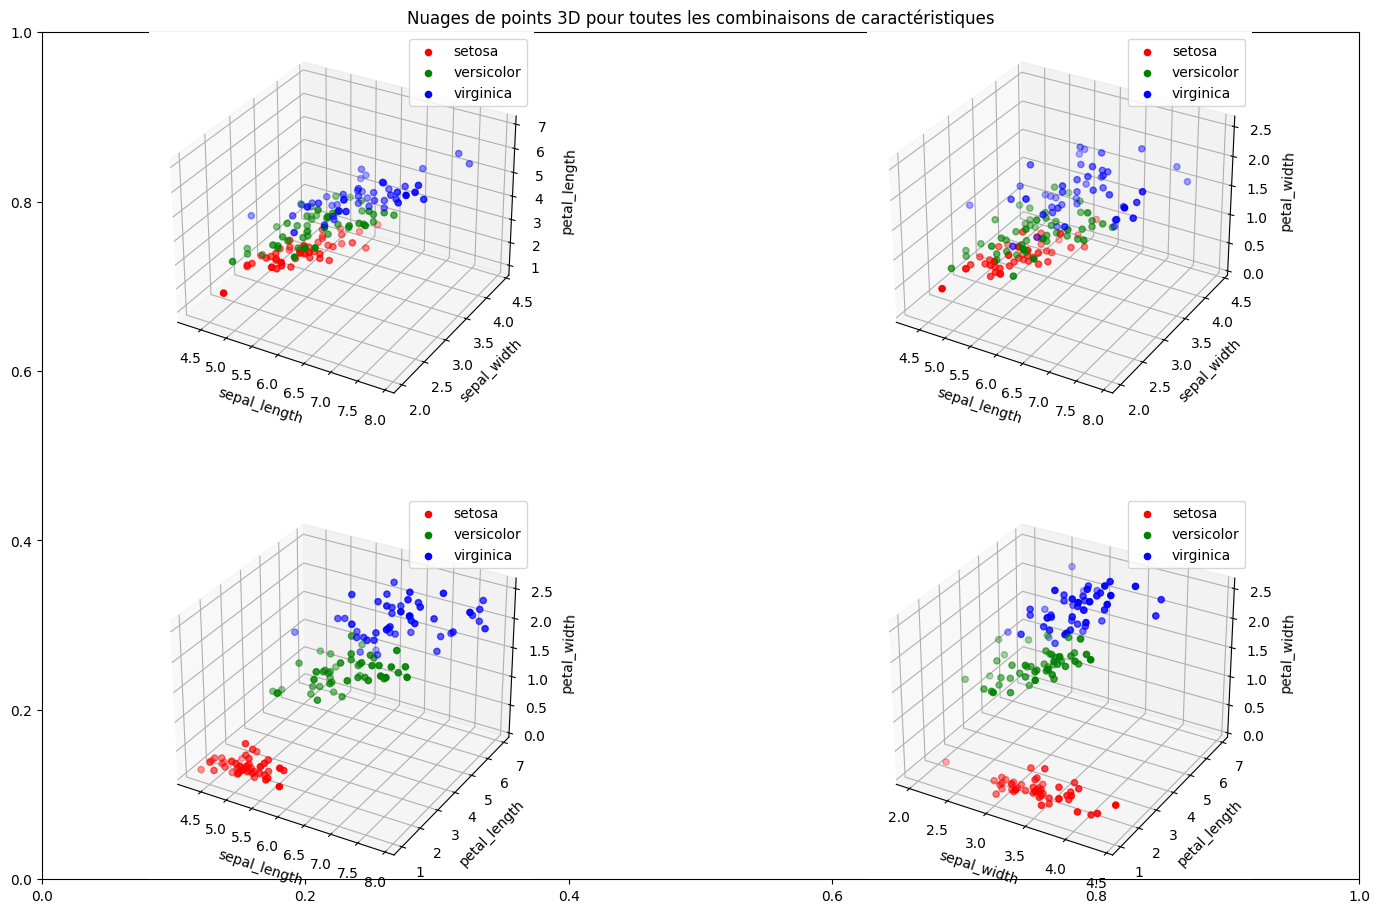

In [145]:
import itertools
from mpl_toolkits.mplot3d import Axes3D

# Définir une correspondance de couleurs pour chaque espèce
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Créer une colonne 'color' basée sur l'espèce pour attribuer une couleur à chaque point
iris_df['color'] = iris_df['species'].map(colors)

# Obtenir toutes les combinaisons possibles de trois caractéristiques parmi les quatre
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
combinations = list(itertools.combinations(features, 3))

# Créer un nuage de points 3D pour chaque combinaison
fig = plt.figure(figsize=(17, 11))
plt.title('Nuages de points 3D pour toutes les combinaisons de caractéristiques')

# Tracer un graphique pour chaque combinaison de caractéristiques
for index, (feat1, feat2, feat3) in enumerate(combinations, start=1):
    ax = fig.add_subplot(2, 2, index, projection='3d')
    for species, color in colors.items():
        subset = iris_df[iris_df['species'] == species]
        ax.scatter(subset[feat1], subset[feat2], subset[feat3], c=color, label=species)
    ax.set_xlabel(f'{feat1}')
    ax.set_ylabel(f'{feat2}')
    ax.set_zlabel(f'{feat3}')
    ax.legend()

plt.show()

#### **g) Diagramme en barres pour la répartition des classes**

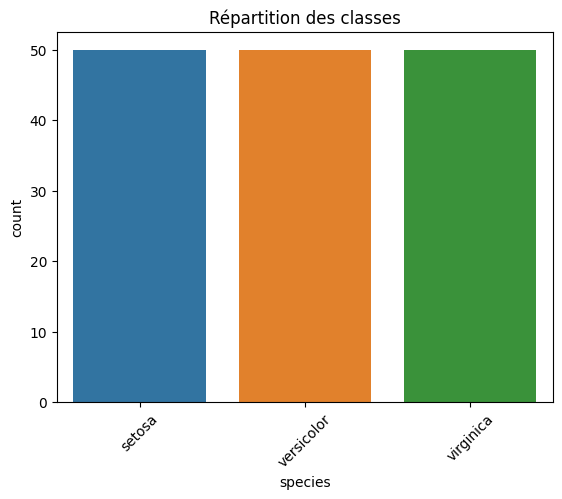

In [146]:
sns.countplot(data=iris_df, x='species')
plt.title('Répartition des classes')
plt.xticks(rotation=45)
plt.show()

### **1.2) Etude statistique de Iris dataset**

#### **a) Analyse Statistique des Caractéristiques**

In [147]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = iris_df.select_dtypes(include=[np.number])

# Statistiques descriptives pour chaque variable
descriptive_stats = numeric_columns.describe()

# Variance pour chaque variable
variance = numeric_columns.var()

# Écart-type pour chaque variable
std_deviation = numeric_columns.std()

# Médiane pour chaque variable
median = numeric_columns.median()

# Afficher les statistiques descriptives
print("Statistiques descriptives :")
print(descriptive_stats)

print("\n ==================================================================")

print("\nVariance :")
print(variance)

print("\n ==================================================================")

print("\nÉcart-type :")
print(std_deviation)

print("\n ==================================================================")

print("\nMédiane :")
print(median)

Statistiques descriptives :
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Variance :
sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64


Écart-type :
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


Médiane :
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


#### **b) Création d'un histogramme pour chaque variable**

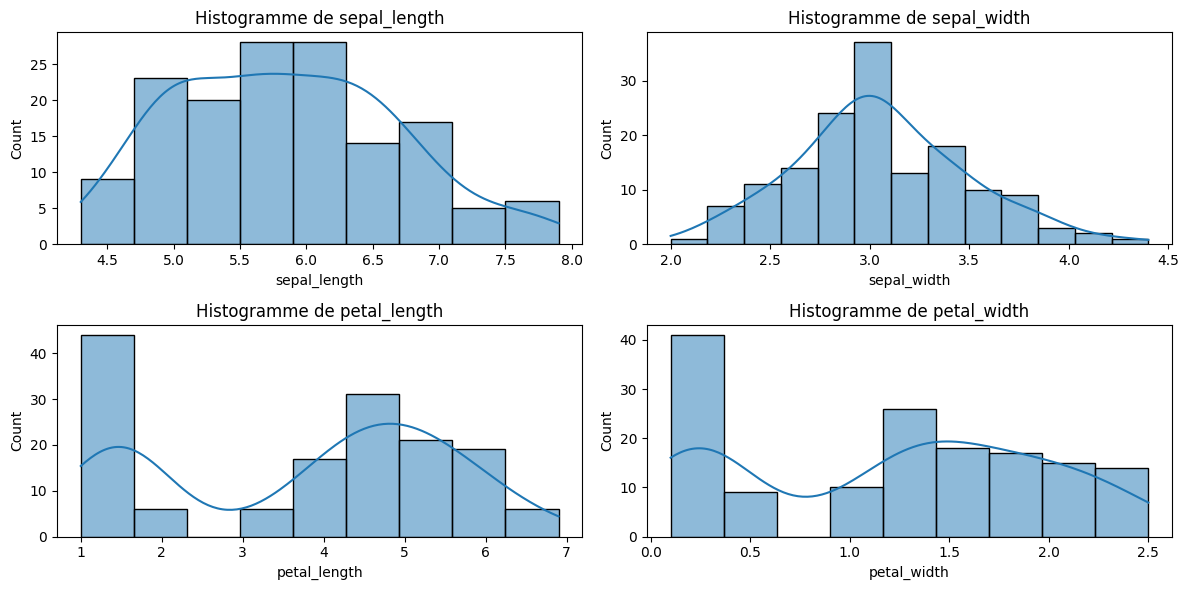

In [148]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_columns.columns[:]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, kde=True)
    plt.title(f'Histogramme de {feature}')
plt.tight_layout()
plt.show()

#### **c) Répartition des espèces dans le jeu de données Iris**

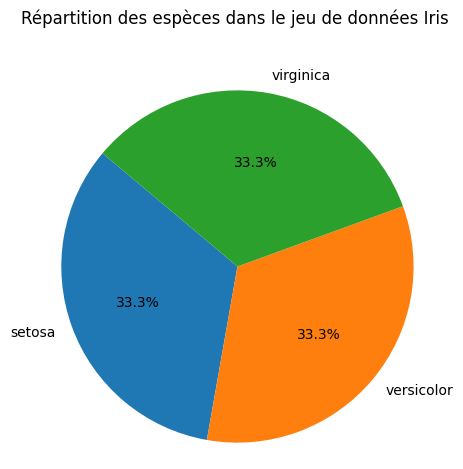

In [149]:
species_counts = iris_df['species'].value_counts()

# Créer un diagramme en secteurs (camembert)
plt.figure(figsize=(5, 5))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des espèces dans le jeu de données Iris \n\n')
plt.axis('equal')  # Pour que le diagramme soit un cercle et non une ellipse
plt.show()

#### **c) Création d'un diagramme en barres empilées**

Le diagramme montre que la taille des pétales, tant en longueur qu'en largeur, varie considérablement entre les espèces d'Iris et pourrait être déterminante pour les distinguer. La longueur des sépales est assez similaire pour deux espèces, mais beaucoup plus courte pour la troisième, tandis que la largeur des sépales ne diffère pas autant. Globalement, les caractéristiques des pétales sont les plus distinctives parmi les mesures analysées.

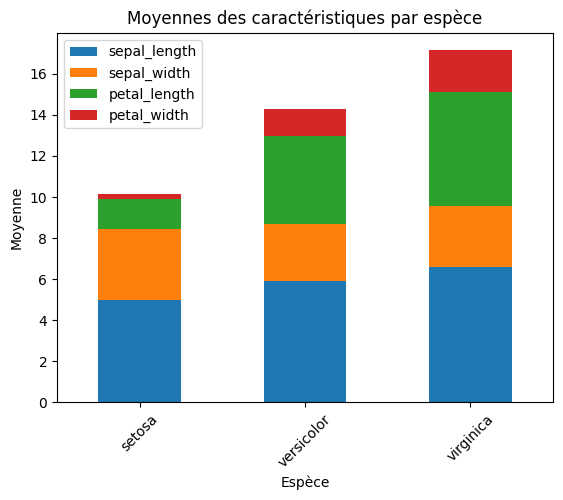

In [150]:
# Créer un DataFrame pivot avec les moyennes des caractéristiques par espèce
pivot_df = iris_df.groupby('species').mean(numeric_only=True)

# Créer un diagramme en barres empilées
pivot_df.plot(kind='bar', stacked=True)
plt.title('Moyennes des caractéristiques par espèce')
plt.xlabel('Espèce')
plt.ylabel('Moyenne')
plt.xticks(rotation=45)
plt.show()

#### **d) Création d'un nuage de points avec des couleurs basées sur la largeur et la longueur du pétale**

Les graphiques montrent que la longueur et la largeur des sépales des iris sont liées à la taille des pétales. Les fleurs avec de plus grands sépales tendent à avoir de plus grands pétales, ce qui est indiqué par un changement graduel de couleur dans les points. Ces tendances visuelles peuvent être utiles pour la classification des espèces d'iris.

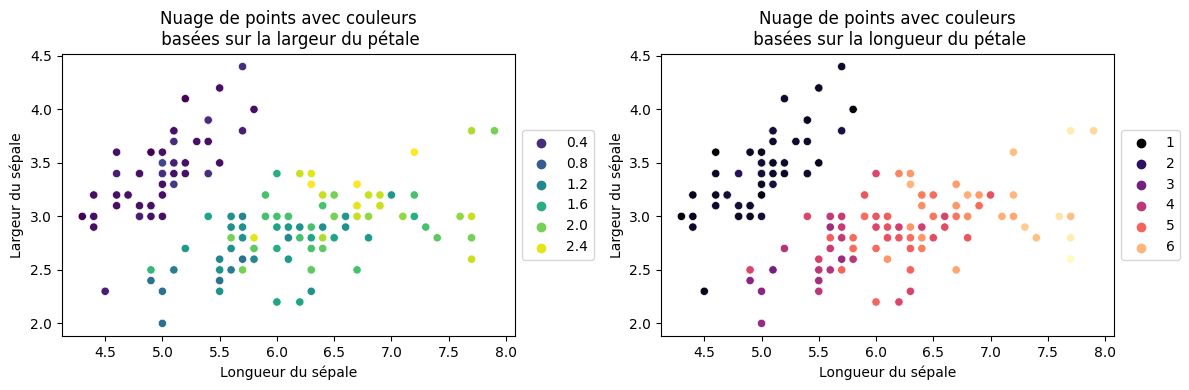

In [151]:
# Créer une figure et un ensemble d'axes de sous-plots avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Créer le premier nuage de points sur le premier axe avec des couleurs basées sur la largeur du pétale (petal_width)
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='petal_width', palette='viridis', ax=axes[0])
axes[0].set_xlabel('Longueur du sépale')
axes[0].set_ylabel('Largeur du sépale')
axes[0].set_title('Nuage de points avec couleurs\n basées sur la largeur du pétale')

# Créer le second nuage de points sur le deuxième axe avec des couleurs basées sur la longueur du pétale (petal_length)
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='petal_length', palette='magma', ax=axes[1])
axes[1].set_xlabel('Longueur du sépale')
axes[1].set_ylabel('Largeur du sépale')
axes[1].set_title('Nuage de points avec couleurs\n basées sur la longueur du pétale')

# Afficher la légende à l'extérieur du graphique sur le premier axe
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Afficher la légende à l'extérieur du graphique sur le deuxième axe
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

# Afficher la figure complète
plt.show()

## **2. Stock Dataset**

### **2.1) Chargement des données**

In [214]:
Apple=pd.read_csv('Apple_Data.csv')
Google=pd.read_csv('Google_Data.csv')
Amazon=pd.read_csv('Amazon_Data.csv')
Tesla=pd.read_csv('Tesla_Data.csv')

In [153]:
print("Apple Dataset")
print("Number of samples:", Apple.shape[1])
print("Number of features:", Apple.shape[0])
print("========================================")
print("Google Dataset")
print("Number of samples:", Google.shape[1])
print("Number of features:", Google.shape[0])
print("========================================")
print("Amazon Dataset")
print("Number of samples:", Amazon.shape[1])
print("Number of features:", Amazon.shape[0])
print("========================================")
print("Tesla Dataset")
print("Number of samples:", Tesla.shape[1])
print("Number of features:", Tesla.shape[0])

Apple Dataset
Number of samples: 11
Number of features: 1028
Google Dataset
Number of samples: 11
Number of features: 1028
Amazon Dataset
Number of samples: 11
Number of features: 1028
Tesla Dataset
Number of samples: 11
Number of features: 1028


### **2.2) Concaténation des datasets Apple, Google,Tesla, Amazon**

In [215]:
company_list = [Apple, Google, Tesla, Amazon]
company_name = ["APPLE", "GOOGLE", "TESLA", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(7)

Date   Price    Open    High     Low     Vol. Change %        coef  \
0  Jan 14, 2022  173.07  171.36  173.75   171.1   78.73M    0.51%  497.296390   
1  Jan 13, 2022  172.19  175.78  176.62  171.79   82.27M   -1.90%  889.874180   
2  Jan 12, 2022  175.53  176.12     NaN  174.82   72.77M    0.26%   33.808154   
3  Jan 11, 2022  175.08  172.32  175.18  170.82   75.94M    1.68%   76.642932   
4  Jan 10, 2022  172.19  169.08   172.5  168.17  103.82M    0.01%  802.343154   
5  Jan 07, 2022  172.17  172.89  174.14  171.03   86.71M    0.10%  419.406528   
6  Jan 06, 2022   172.0   172.7   175.3  171.64   95.42M   -1.67%  769.383989   

   state  activity_in  activity_out company_name  
0    6.0   544.567398    290.106619        APPLE  
1    1.0   958.830431    116.604922        APPLE  
2    1.0   651.171829    892.616525        APPLE  
3    2.0   212.135502    539.260305        APPLE  
4    9.0   139.144297    399.070275        APPLE  
5    0.0   482.941597     46.037655        APPLE  
6    7.0   925.907870    863.828101        APPLE

### **2.3) Data preprocessing**

#### **a) Changement du format et type des dates**

In [216]:
df['Date']=pd.to_datetime(df['Date'])
df.head(5)

Date   Price    Open    High     Low     Vol. Change %        coef  \
0 2022-01-14  173.07  171.36  173.75   171.1   78.73M    0.51%  497.296390   
1 2022-01-13  172.19  175.78  176.62  171.79   82.27M   -1.90%  889.874180   
2 2022-01-12  175.53  176.12     NaN  174.82   72.77M    0.26%   33.808154   
3 2022-01-11  175.08  172.32  175.18  170.82   75.94M    1.68%   76.642932   
4 2022-01-10  172.19  169.08   172.5  168.17  103.82M    0.01%  802.343154   

   state  activity_in  activity_out company_name  
0    6.0   544.567398    290.106619        APPLE  
1    1.0   958.830431    116.604922        APPLE  
2    1.0   651.171829    892.616525        APPLE  
3    2.0   212.135502    539.260305        APPLE  
4    9.0   139.144297    399.070275        APPLE

#### **b) Correction du problème de la virgule sdans la colonne 'Price', 'Open', 'High' et 'Low'**

In [217]:
df['Price']

0         173.07
1         172.19
2         175.53
3         175.08
4         172.19
          ...   
1023    1,174.76
1024    1,177.62
1025    1,187.38
1026    1,190.58
1027    1,179.14
Name: Price, Length: 4112, dtype: object

In [218]:
# Suppression des virgules et conversion du type à float
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
df['Price']

0        173.07
1        172.19
2        175.53
3        175.08
4        172.19
         ...   
1023    1174.76
1024    1177.62
1025    1187.38
1026    1190.58
1027    1179.14
Name: Price, Length: 4112, dtype: float64

In [219]:
# De la même manière pour les autres colonnes
df['Open'] = pd.to_numeric(df['Open'].astype(str).str.replace(',', ''), errors='coerce')
df['High'] = pd.to_numeric(df['High'].astype(str).str.replace(',', ''), errors='coerce')
df['Low'] = pd.to_numeric(df['Low'].astype(str).str.replace(',', ''), errors='coerce')

#### **c) Suppression de 'M' du colonnes 'VOl' et la converssion du type**

In [220]:
df['Vol.']

0        78.73M
1        82.27M
2        72.77M
3        75.94M
4       103.82M
         ...   
1023      2.12M
1024      2.37M
1025      2.59M
1026      2.95M
1027      4.78M
Name: Vol., Length: 4112, dtype: object

In [221]:
def convert_volume_to_float(volume):
    volume_str = str(volume)
    # Suppression de la 'M' et multiplier la valeur par 1 million, en suite la converssion du type en float
    if 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1e6
    # Suppression de la 'K' et multiplier la valeur par 1 mille, en suite la converssion du type en float
    elif 'K' in volume_str:
        return float(volume_str.replace('K', '')) * 1e3
    else:
        return float(volume_str)

In [222]:
# Application de la fonction sur la colonne'Vol.'
df['Vol.'] = df['Vol.'].apply(convert_volume_to_float)
df.head(5)

Date   Price    Open    High     Low         Vol. Change %  \
0 2022-01-14  173.07  171.36  173.75  171.10   78730000.0    0.51%   
1 2022-01-13  172.19  175.78  176.62  171.79   82270000.0   -1.90%   
2 2022-01-12  175.53  176.12     NaN  174.82   72770000.0    0.26%   
3 2022-01-11  175.08  172.32  175.18  170.82   75940000.0    1.68%   
4 2022-01-10  172.19  169.08  172.50  168.17  103820000.0    0.01%   

         coef  state  activity_in  activity_out company_name  
0  497.296390    6.0   544.567398    290.106619        APPLE  
1  889.874180    1.0   958.830431    116.604922        APPLE  
2   33.808154    1.0   651.171829    892.616525        APPLE  
3   76.642932    2.0   212.135502    539.260305        APPLE  
4  802.343154    9.0   139.144297    399.070275        APPLE

#### **d) Suppression du symbole '%' du colonne 'Change'**

In [223]:
df['Change %']

0        0.51%
1       -1.90%
2        0.26%
3        1.68%
4        0.01%
         ...  
1023    -0.24%
1024    -0.82%
1025    -0.27%
1026     0.97%
1027     0.42%
Name: Change %, Length: 4112, dtype: object

In [224]:
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) * 100
df.head(5)

Date   Price    Open    High     Low         Vol.  Change %  \
0 2022-01-14  173.07  171.36  173.75  171.10   78730000.0      51.0   
1 2022-01-13  172.19  175.78  176.62  171.79   82270000.0    -190.0   
2 2022-01-12  175.53  176.12     NaN  174.82   72770000.0      26.0   
3 2022-01-11  175.08  172.32  175.18  170.82   75940000.0     168.0   
4 2022-01-10  172.19  169.08  172.50  168.17  103820000.0       1.0   

         coef  state  activity_in  activity_out company_name  
0  497.296390    6.0   544.567398    290.106619        APPLE  
1  889.874180    1.0   958.830431    116.604922        APPLE  
2   33.808154    1.0   651.171829    892.616525        APPLE  
3   76.642932    2.0   212.135502    539.260305        APPLE  
4  802.343154    9.0   139.144297    399.070275        APPLE

#### **e) Missig value**

##### **e.1) Aperçu des valeurs manquantes**

In [225]:
print("Nombre total des veleurs manquantes :", df.isna().sum().sum())

Nombre total des veleurs manquantes : 586


In [226]:
print("Nombre de valeurs manquantes dans chaque colonne : ")
print(df.isna().sum())

Nombre de valeurs manquantes dans chaque colonne : 
Date            67
Price           53
Open            56
High            43
Low             47
Vol.            56
Change %        53
coef            50
state           59
activity_in     50
activity_out    52
company_name     0
dtype: int64


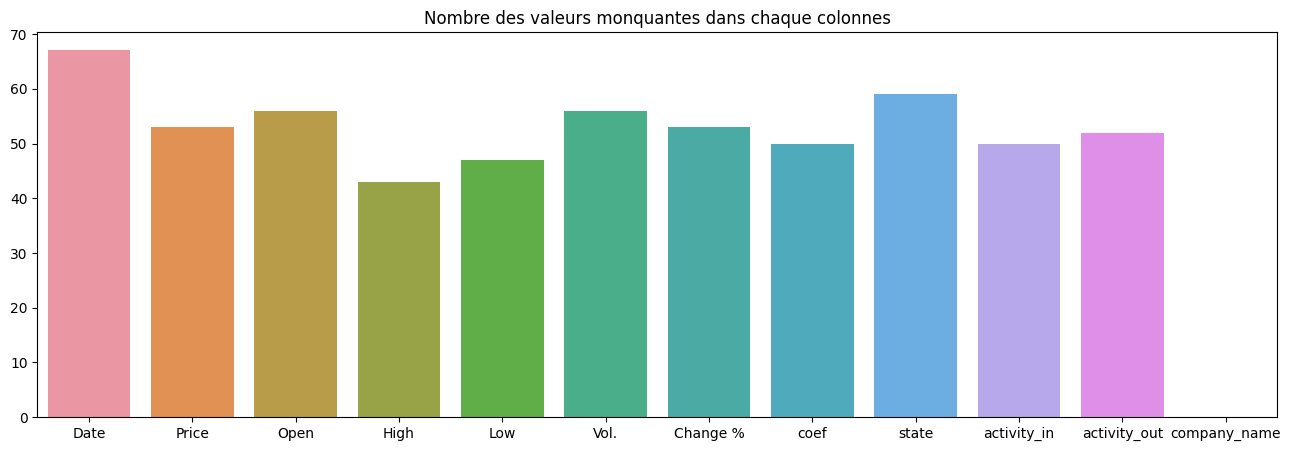

In [227]:
plt.figure(figsize= (16,5))
sns.barplot(x=df.columns,y=df.isna().sum(),orient='v')
plt.title("Nombre des valeurs monquantes dans chaque colonnes")
plt.show()

##### **e.2) Remplacement des valeurs manquantes par la mediane pour les colonnes numériques**

In [228]:
# Group by 'company_name', then fill missing values in each group
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df.groupby('company_name')[col].transform(lambda x: x.fillna(x.median()))

print('Les valeurs manquantes restantes : ',df.isna().sum().sum())

Les valeurs manquantes restantes :  67


In [229]:
df.isna().sum()

Date            67
Price            0
Open             0
High             0
Low              0
Vol.             0
Change %         0
coef             0
state            0
activity_in      0
activity_out     0
company_name     0
dtype: int64

##### **e.3) Remplacement des valeurs manquantes pour la colonne 'Date' avec la date la plus fréquente**

In [230]:
# Filtrer les dates non manquantes
dates_non_null = df['Date'].dropna()

# Trouver l'année la plus fréquente
most_common_year = dates_non_null.dt.year.mode()[0]

# Filtrer les données pour cette année
dates_common_year = dates_non_null[dates_non_null.dt.year == most_common_year]

# Trouver le mois le plus fréquent dans cette année
most_common_month = dates_common_year.dt.month.mode()[0]

# Filtrer les données pour ce mois de l'année la plus fréquente
dates_common_month = dates_common_year[dates_common_year.dt.month == most_common_month]

# Trouver le jour le plus fréquent dans ce mois de cette année
most_common_day = dates_common_month.dt.day.mode()[0]

# Construire la date la plus fréquente à utiliser pour remplacer les valeurs NaN
replacement_date = pd.Timestamp(year=most_common_year, month=most_common_month, day=most_common_day)

# Remplacer les valeurs NaN dans la colonne 'Date'
df['Date'].fillna(replacement_date, inplace=True)

In [231]:
print('Les valeurs manquantes restantes :')
print(df.isna().sum().sum())

Les valeurs manquantes restantes :
0


In [232]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=[np.number])
# Statistiques descriptives pour chaque variable
descriptive_stats = numeric_columns.describe()
# Variance pour chaque variable
variance = numeric_columns.var()
# Écart-type pour chaque variable
std_deviation = numeric_columns.std()
# Médiane pour chaque variable
median = numeric_columns.median()
# Afficher les statistiques descriptives
print("Statistiques descriptives :")
print(descriptive_stats)
print("\n ==================================================================")
print("\nVariance :")
print(variance)
print("\n ==================================================================")
print("\nÉcart-type :")
print(std_deviation)
print("\n ==================================================================")
print("\nMédiane :")
print(median)


Statistiques descriptives :
             Price         Open         High          Low          Vol.  \
count  4112.000000  4112.000000  4112.000000  4112.000000  4.112000e+03   
mean   1077.819652  1078.937096  1090.408864  1065.060224  4.427593e+07   
std    1061.135585  1062.706216  1072.989596  1049.913222  5.905174e+07   
min      35.550000    35.990000    36.430000    35.400000  4.656400e+05   
25%      71.660000    71.270000    72.222500    70.097500  2.560000e+06   
50%    1044.800000  1046.300000  1060.240000  1023.580000  1.283000e+07   
75%    1755.310000  1760.020000  1770.350000  1739.490000  7.566000e+07   
max    3731.410000  3740.000000  3773.000000  3697.220000  4.268800e+08   

          Change %         coef        state  activity_in  activity_out  
count  4112.000000  4112.000000  4112.000000  4112.000000   4112.000000  
mean     18.730788   503.448625     4.513132   501.774297    489.732875  
std     264.323775   288.417691     2.862421   288.284718    285.065506  


### **2.4) Visualisation et étude statique de dataset**

#### **a) historical view of the  price "APPLE", "GOOGLE", "Tesla", "AMAZON" 2018 -2022**

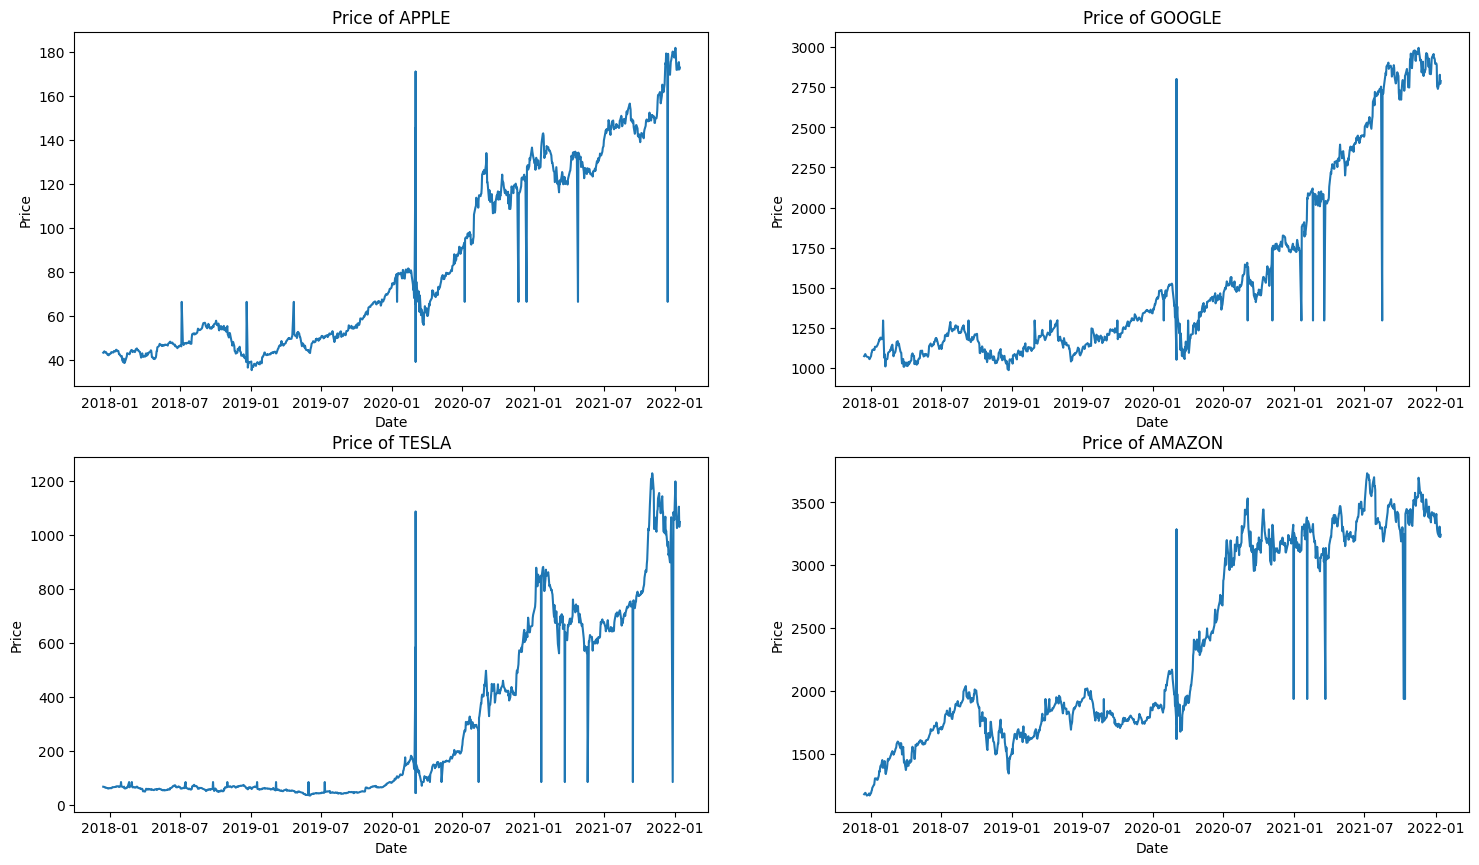

In [172]:
plt.figure(figsize=(18, 26))
plt.subplots_adjust(top=1.5, bottom=1.2)

tmp_df = df.copy()
tmp_df['Date'] = pd.to_datetime(tmp_df['Date'])
tmp_df = tmp_df.sort_values(by='Date')

for i, name in enumerate(company_name, start=1):
    plt.subplot(2, 2, i)
    # Selecting the subset of data for each company
    subset = tmp_df[tmp_df['company_name'] == name]
    # Extracting 'Date' and 'Price' for the plot
    date = subset['Date']
    price = subset['Price']

    # Creating a new figure for each company
    plt.plot(date, price)
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.title(f"Price of {name}")

plt.show()

#### **b) Etude statistique de la dataset**

In [173]:
df.describe()

Price         Open         High          Low          Vol.  \
count  4112.000000  4112.000000  4112.000000  4112.000000  4.112000e+03   
mean   1077.819652  1078.937096  1090.408864  1065.060224  4.427593e+07   
std    1061.135585  1062.706216  1072.989596  1049.913222  5.905174e+07   
min      35.550000    35.990000    36.430000    35.400000  4.656400e+05   
25%      71.660000    71.270000    72.222500    70.097500  2.560000e+06   
50%    1044.800000  1046.300000  1060.240000  1023.580000  1.283000e+07   
75%    1755.310000  1760.020000  1770.350000  1739.490000  7.566000e+07   
max    3731.410000  3740.000000  3773.000000  3697.220000  4.268800e+08   

          Change %         coef        state  activity_in  activity_out  
count  4112.000000  4112.000000  4112.000000  4112.000000   4112.000000  
mean     18.730788   503.448625     4.513132   501.774297    489.732875  
std     264.323775   288.417691     2.862421   288.284718    285.065506  
min   -2106.000000     0.087841     0.000000     0.411954      0.873635  
25%     -91.000000   253.191127     2.000000   253.439472    244.180774  
50%      15.000000   507.209726     4.000000   494.924903    485.673151  
75%     128.250000   749.152969     7.000000   747.685945    727.871682  
max    1990.000000   999.865616     9.000000   999.915627    999.689931

#### **c) Variances du prix avec les autre variables (Apple dataset)**

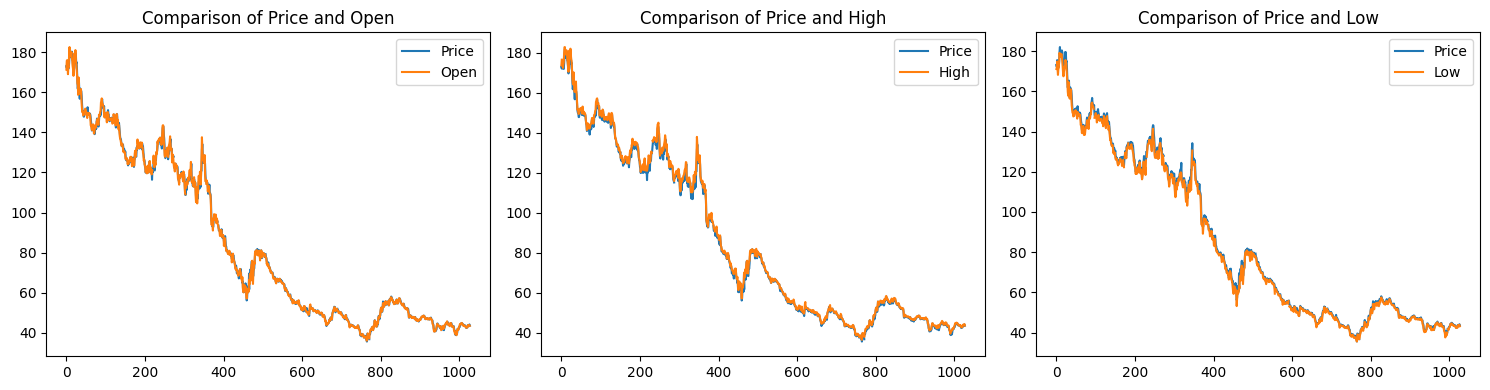

In [174]:
# Define the combinations you want to plot
combinations = [('Price', 'Open'), ('Price', 'High'), ('Price', 'Low')]

# Create a figure with subplots
plt.figure(figsize=(15, 4))  # Adjust the figure size as needed

for i, cols in enumerate(combinations, start=1):
    plt.subplot(1, 3, i)  # 3 rows, 1 column, i-th subplot
    plt.plot(Apple.loc[:, cols])
    plt.legend(cols)
    plt.title(f"Comparison of {cols[0]} and {cols[1]}")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

#### **d) Variances des variables entre eux (Apple dataset)**

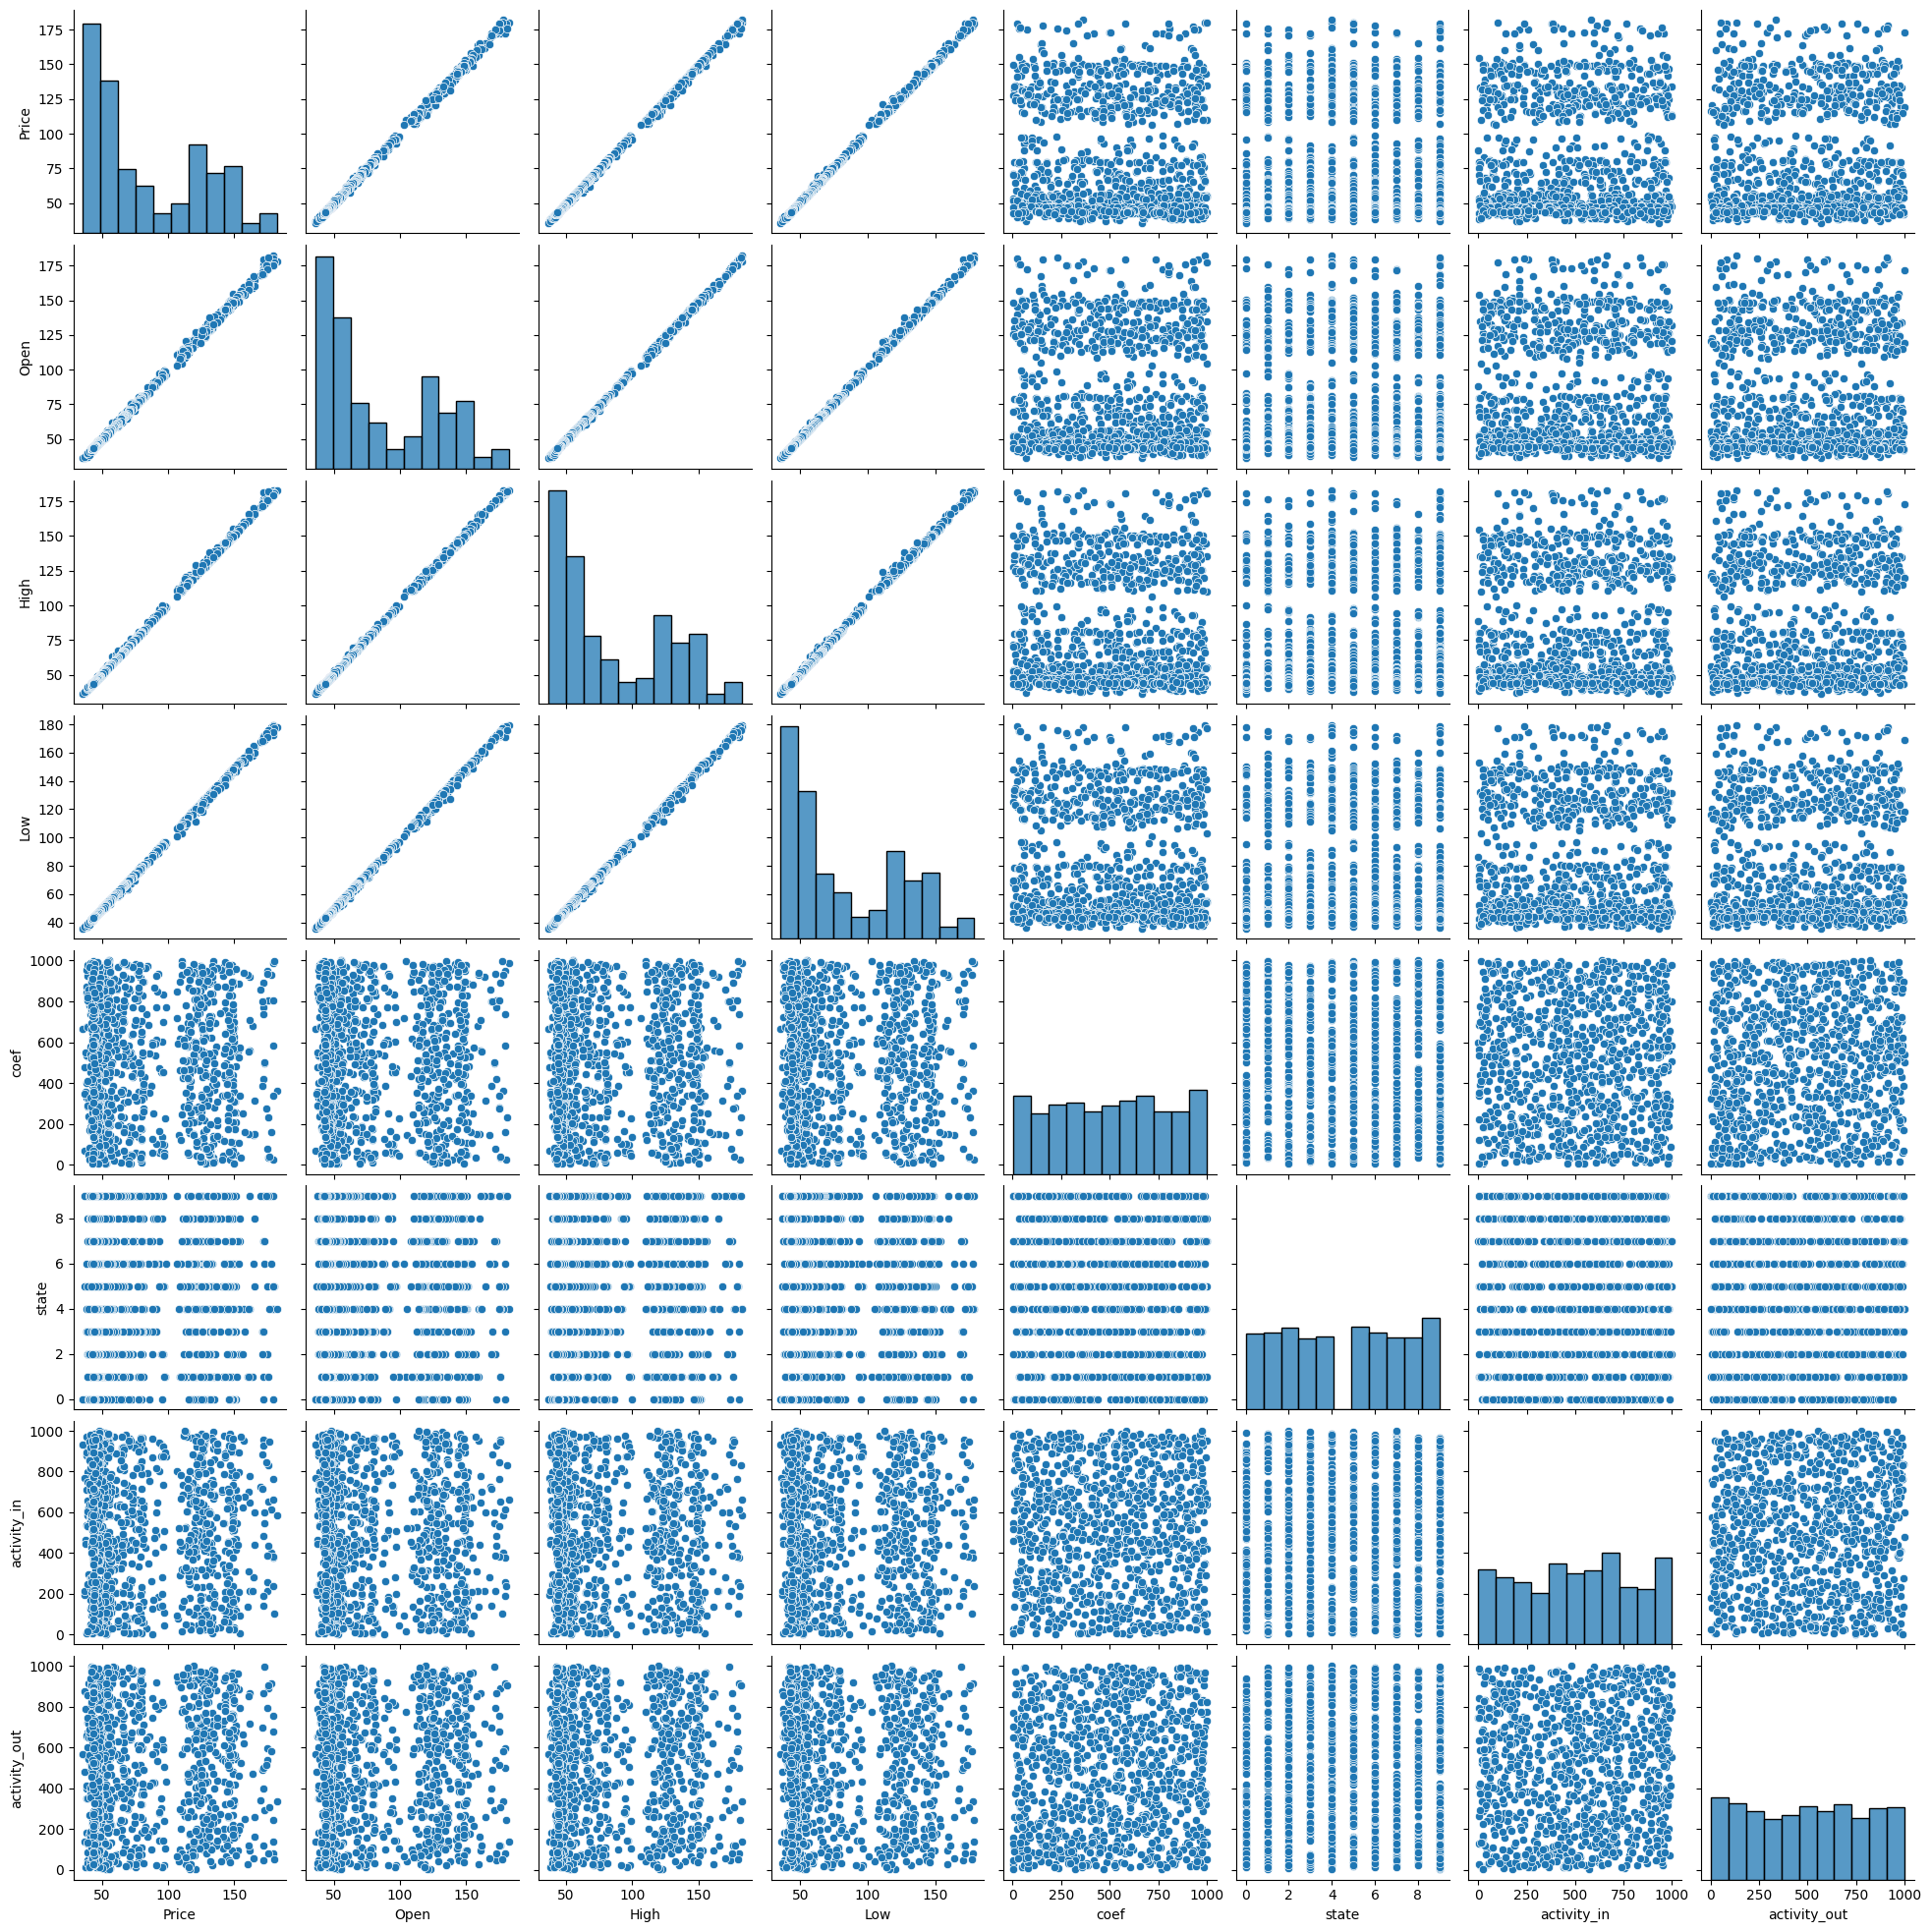

In [175]:
sns.pairplot(Apple,height=2.5)

#### **e) Matrice de correlation**

<Axes: >

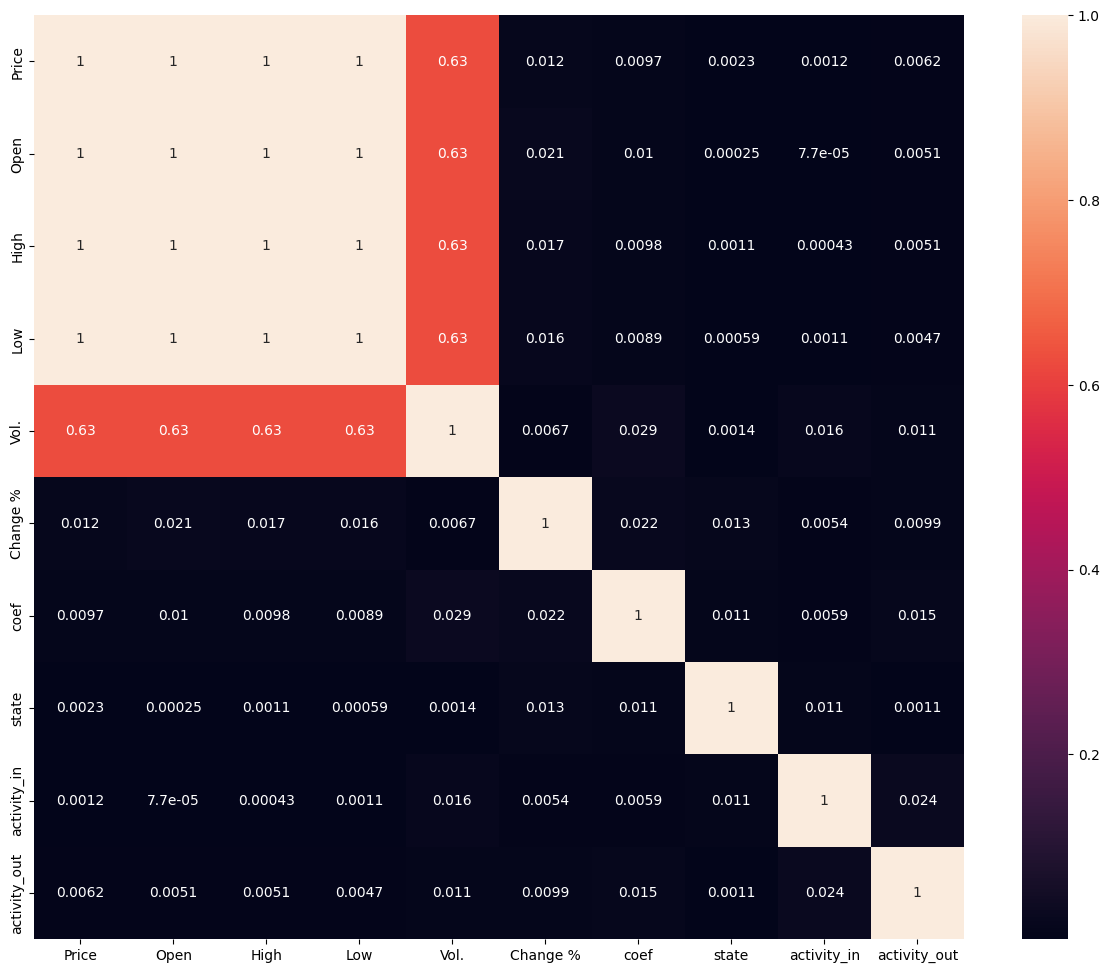

In [176]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True).abs(),annot=True)

#### **e) Distribution des données**

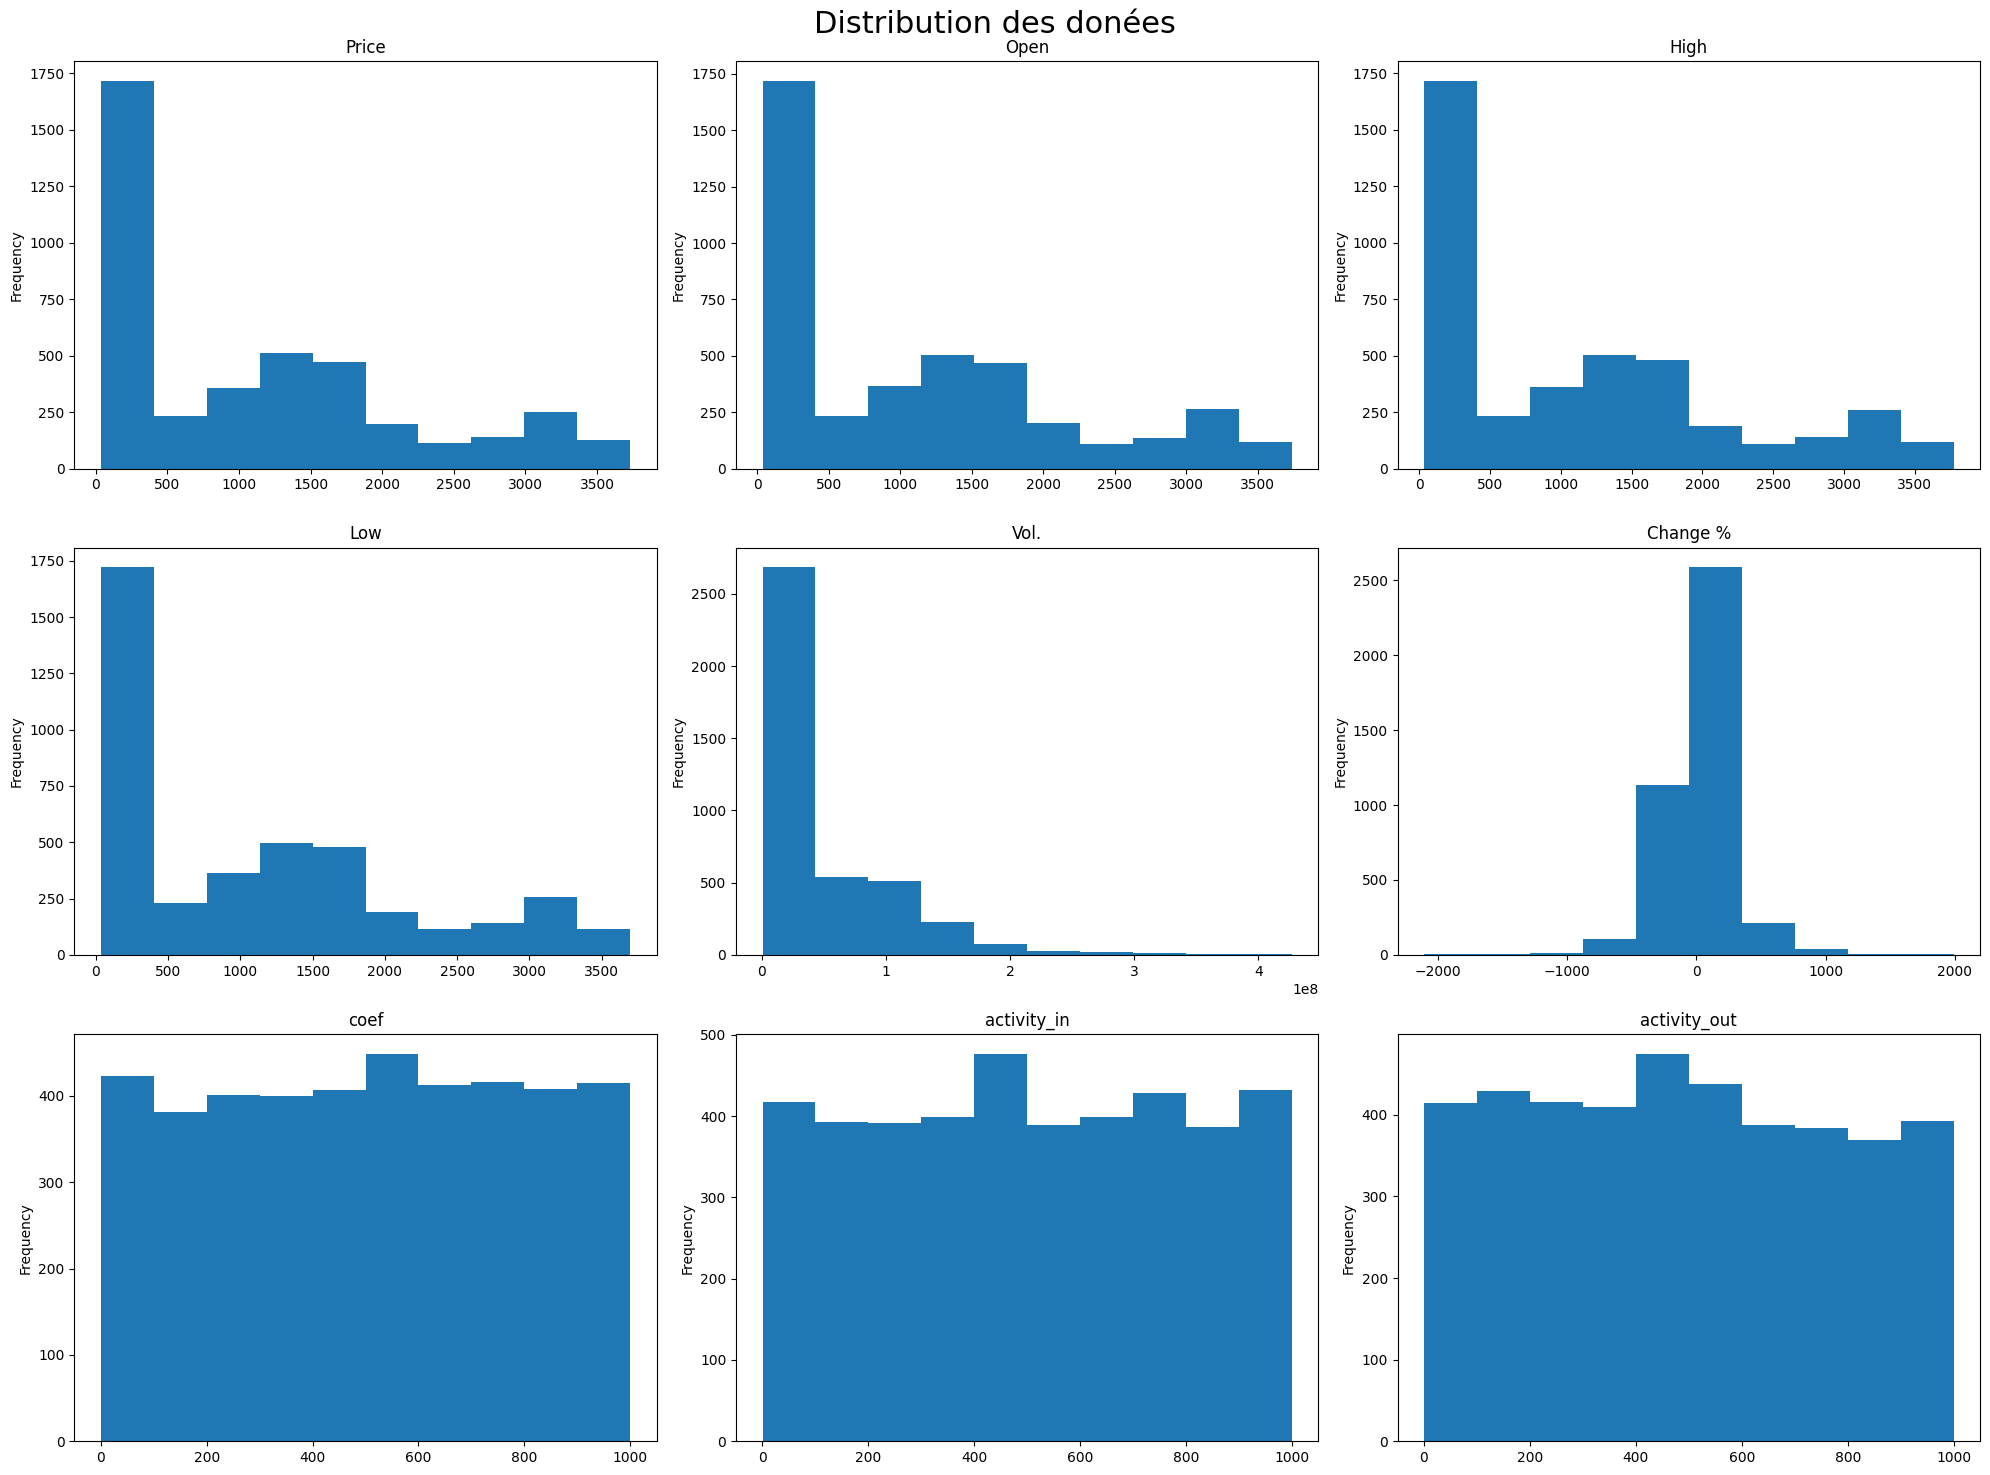

In [178]:
tmp = df.copy()
tmp.drop(['Date','company_name', 'state'], axis=1, inplace=True)
# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.ravel()  # flatten the array of axes
fig.suptitle('Distribution des donées', fontsize=22)

for i, col in enumerate(tmp.columns):
    ax = axes[i]
    tmp[col].dropna().hist(ax=ax)  # Drop NaN values before creating histogram
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)

# Remove the empty subplots (if the number of columns is less than the number of subplots)
for i in range(len(tmp.columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

# **<span style="color:green; font-size:24px;">Etape 2 : Feature selection pour les deux Dataset</span>**

## **1. Iris Dataset**

In [179]:
X = iris.data
y = iris.target

# Créer un DataFrame Pandas avec les données
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)

# Ajouter la colonne cible "target" au DataFrame
iris_df['target'] = y

iris_df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### **1.1) La normalisation des  données Iris**

In [180]:
from sklearn.preprocessing import MinMaxScaler

# Normaliser les données avec Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Créer un DataFrame Pandas avec des noms de colonnes
normalized_df = pd.DataFrame(X_normalized, columns=iris.feature_names)

# Afficher les premières lignes du DataFrame normalisé
normalized_df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

### **1.2) Les Résultas de  La Classification  Avant Feature selection avec (KNN,SVM,Logistic Regression,Gradient Boosting,Decision Tree)**

In [181]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Classification avec K plus proches voisins (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

# Classification avec arbre de décision
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)

# Classification avec Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Classification avec Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Classification avec Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)

# Afficher les performances de chaque algorithme
print(f"Accuracy (KNN): {knn_accuracy}")
print(f"Accuracy (Decision Tree): {dt_accuracy}")
print(f"Accuracy (Logistic Regression): {lr_accuracy}")
print(f"Accuracy (SVM): {svm_accuracy}")
print(f"Accuracy (Random Forest): {rf_accuracy}")
print(f"Accuracy (Gradient Boosting): {gb_accuracy}")

print("\n=============================================================")

# Afficher les rapports de classification pour chaque algorithme
print("\nClassification Report (KNN):\n", classification_report(y_test, knn_predictions))
print("=============================================================")
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, dt_predictions))
print("=============================================================")
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))
print("=============================================================")
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_predictions))
print("=============================================================")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_predictions))
print("=============================================================")
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, gb_predictions))

Accuracy (KNN): 1.0
Accuracy (Decision Tree): 1.0
Accuracy (Logistic Regression): 0.9111111111111111
Accuracy (SVM): 1.0
Accuracy (Random Forest): 1.0
Accuracy (Gradient Boosting): 1.0


Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00  

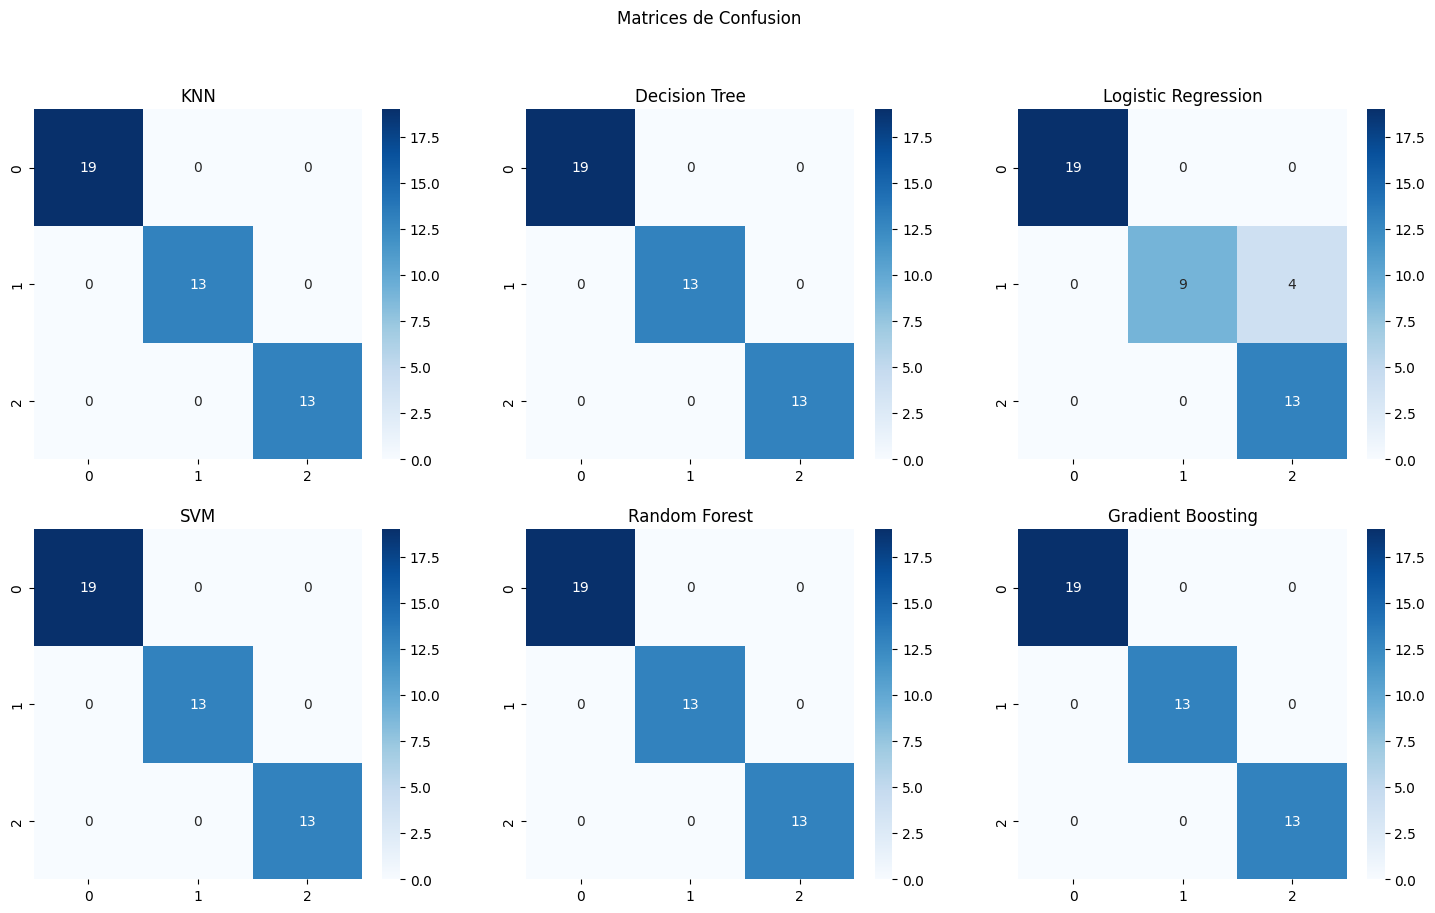

In [182]:
# Plot des matrices de confusion pour chaque algorithme
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Matrices de Confusion')

# KNN
sns.heatmap(knn_confusion_matrix, annot=True, cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title('KNN')

# Decision Tree
sns.heatmap(dt_confusion_matrix, annot=True, cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')

# Logistic Regression
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues", ax=axes[0, 2])
axes[0, 2].set_title('Logistic Regression')

# SVM
sns.heatmap(svm_confusion_matrix, annot=True, cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_title('SVM')

# Random Forest
sns.heatmap(rf_confusion_matrix, annot=True, cmap="Blues", ax=axes[1, 1])
axes[1, 1].set_title('Random Forest')

# Gradient Boosting
sns.heatmap(gb_confusion_matrix, annot=True, cmap="Blues", ax=axes[1, 2])
axes[1, 2].set_title('Gradient Boosting')

plt.show()

#### **<span style="color:red; font-size:16px;">Remarque : Puisque tous les algorithmes donnent une précision de 100 %, sauf la régression logistique qui donne 0,91, nous allons continuer avec la régression logistique pour voir l'évolution après la sélection des caractéristiques.</span>**

### **1.3) La selection des caracteristiques**

#### **a)** Méthode de Features Selection : **La variance**

##### **a.1) Application de la variance thresholding**

In [183]:
from sklearn.feature_selection import VarianceThreshold
# Création de l'objet VarianceThreshold pour performer la variance thresholding
selector = VarianceThreshold()

# Performer la variance thresholding
selector.fit_transform(X_train)

# Afichage des variables et leurs variance
for feature in zip(feature_names, selector.variances_):
    print(feature)

('sepal length (cm)', 0.05306962291089273)
('sepal width (cm)', 0.030176051902242384)
('petal length (cm)', 0.08431033123773306)
('petal width (cm)', 0.0948576467624086)


##### **a.2) visualisation de  variances**

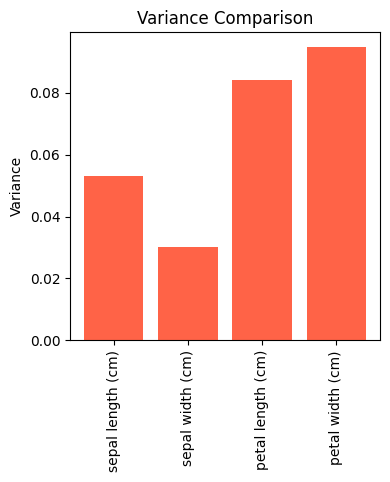

In [184]:
# Création du bar chart pour visualiser la variance
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')
plt.show()

###### **<span style="color:red; font-size:16px;">Remarque : D'après la variance  en peut eliminer la variable  sepal width (cm) qui a la plus petite variance.</span>**

##### **a.3) La prédiction avec les variables selectionnées selon la vriance la plus elevée**

In [185]:
# Sélectionnez uniquement les colonnes 0, 2 et 3 (1ère, 3ème et 4ème colonnes)
selected_columns = [0, 2, 3]
X_train_selected = X_train[:, selected_columns]
X_test_selected=X_test[:, selected_columns]
# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Afficher les performances de la RL
print(f"Accuracy (Logistic Regression): {lr_accuracy}")

# Afficher les rapports de classification pour la RL
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))

Accuracy (Logistic Regression): 0.9555555555555556

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



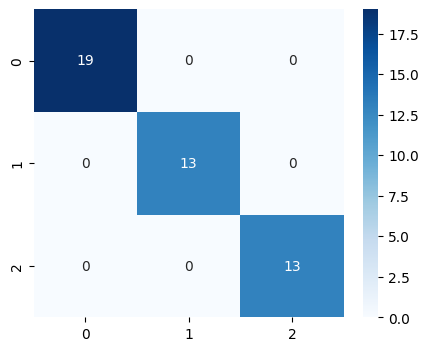

In [196]:
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# # Création du bar chart pour visualiser la variance
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### **b)** Méthode de Features Selection : **Critère de l’information mutuelle**

##### **b.1) Application de la mutual_info_regression**

In [197]:
from sklearn.feature_selection import mutual_info_regression
# Création de l'objet mutual_info_regression pour calculer l'information mutuelle
MI_score = mutual_info_regression(X_train, y_train, random_state=0)

# Afichage des variables et leurs information mutuelle
for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4189054082088899)
('sepal width (cm)', 0.2638717837058375)
('petal length (cm)', 0.9992534531043944)
('petal width (cm)', 0.9149896402713478)


##### **b.2) Visualisation des mutual information scores**

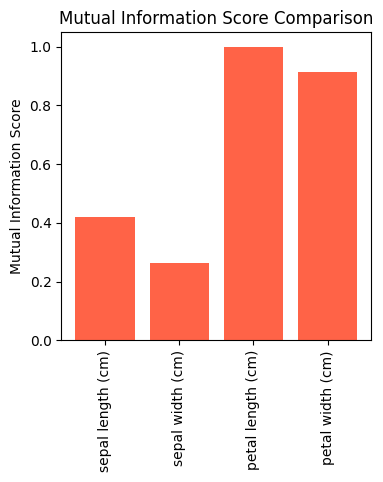

In [198]:
# Creation d'un bar chart pour visualiser les mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

###### **<span style="color:red; font-size:16px;">Remarque : D'après la Methode Critère de l’information mutuelle on peut éliminer la variable sepal width (cm).</span>**

##### **b.3) La prédiction avec les variables selectionnées par mutual inforamtion**

In [189]:
# Sélectionnez uniquement les colonnes 0, 2 et 3 (1ère, 3ème et 4ème colonnes)
selected_columns = [0, 2, 3]
X_train_selected = X_train[:, selected_columns]
X_test_selected=X_test[:, selected_columns]
# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Afficher les performances de la RL
print(f"Accuracy (Logistic Regression): {lr_accuracy}")

# Afficher les rapports de classification pour la RL
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))

Accuracy (Logistic Regression): 0.9555555555555556

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



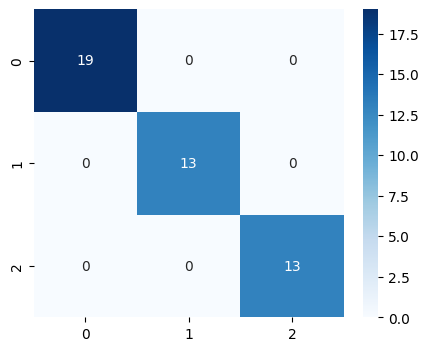

In [199]:
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# # Création du bar chart pour visualiser la variance
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### **c)** Méthode de Features Selection : **Fisher Test**

##### **c.1) Application de la f_regression**

In [200]:
from sklearn.feature_selection import f_regression
f_value = f_regression(X_train, y_train)

# Affichage des F-value pour chaque variable
for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 148.9176235918675)
('sepal width (cm)', 14.26826404378043)
('petal length (cm)', 874.9823343334599)
('petal width (cm)', 914.9962909520683)


##### **c.2) Visualisation des F-values**

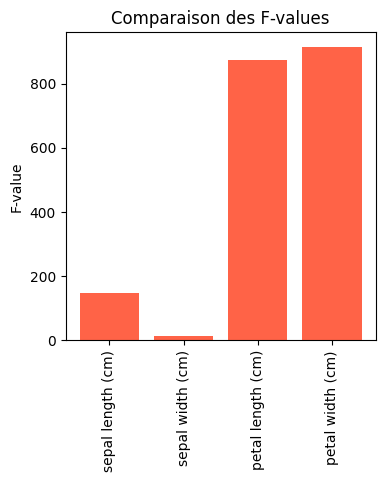

In [201]:
# Création d'un bar chart pour visualiser les F-values
plt.figure(figsize=(4, 4))
plt.bar(x=iris.feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('Comparaison des F-values')
plt.show()

##### **c.3) La prédiction avec les variables selectionnées par la methode F_value fisher**

In [202]:
# Sélectionnez uniquement les colonnes 2 et 3 (3ème et 4ème colonnes)
selected_columns = [2, 3] ## les colonne selctionnée
X_train_selected = X_train[:, selected_columns]
X_test_selected=X_test[:, selected_columns]
# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Afficher les performances de la RL
print(f"Accuracy (Logistic Regression): {lr_accuracy}")

# Afficher les rapports de classification pour la RL
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))

Accuracy (Logistic Regression): 1.0

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



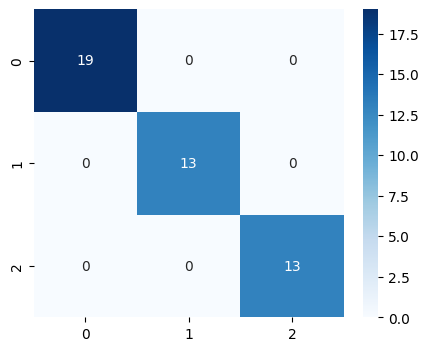

In [203]:
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# # Création du bar chart pour visualiser la variance
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues")
plt.show()

#### **d)** Méthode de Features Selection : **Forward/Sequential Features selction SFS**

##### **d.1) Application de la Forward SFS**

Meilleur sous-ensemble (indices): (2, 3)
Meilleur sous-ensemble (noms correspondants): ['petal length (cm)', 'petal width (cm)']




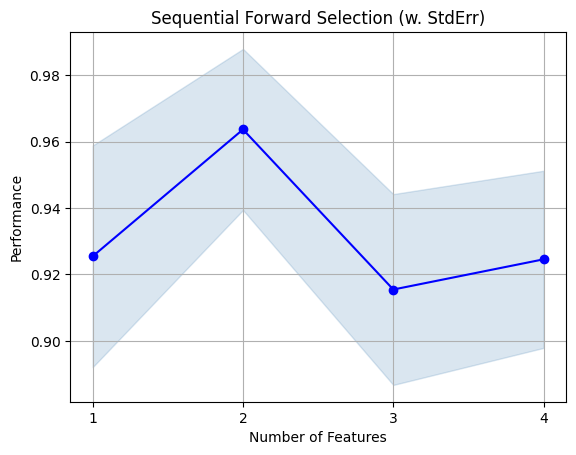

In [204]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Créer une instance de modèle Logistic Regression
logistic_regression = LogisticRegression()

# Créer un objet SequentialFeatureSelector
sfs = SFS(logistic_regression,
          k_features=(1, X_train.shape[1]),  # Utilisez X_train.shape[1] comme valeur maximale
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=10)

# Effectuer la sélection des caractéristiques sur les données d'entraînement
sfs = sfs.fit(X_train, y_train)

# Afficher les résultats de la sélection des caractéristiques
print('Meilleur sous-ensemble (indices):', sfs.k_feature_idx_)
best_feature_names = [iris_df.columns[i] for i in sfs.k_feature_idx_]
print('Meilleur sous-ensemble (noms correspondants):', best_feature_names)
print("\n")

# Tracer la performance de la sélection des caractéristiques
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

##### **d.2) La prédiction avec les variables selectionnées par la methode Forward SFS**

In [205]:
# Sélectionnez uniquement les colonnes 2 et 3 (3ème et 4ème colonnes)
selected_columns = [2, 3]
X_train_selected = X_train[:, selected_columns]
X_test_selected=X_test[:, selected_columns]
# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_predictions)


# Afficher les performances de la RL
print(f"Accuracy (Logistic Regression): {lr_accuracy}")

# Afficher les rapports de classification pour la RL
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))

Accuracy (Logistic Regression): 1.0

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



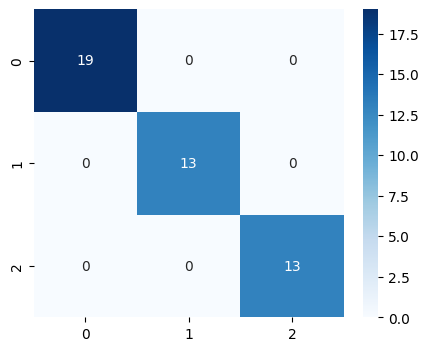

In [207]:
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# # Création du bar chart pour visualiser la variance
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues")
plt.show()

####  **e)** Méthode de Features Selection : **Backward/Sequential Features selctionS**

##### **e.1) Application de la Backward SFS**

Meilleur sous-ensemble (indices): (2, 3)
Meilleur sous-ensemble (noms correspondants): ['petal length (cm)', 'petal width (cm)']




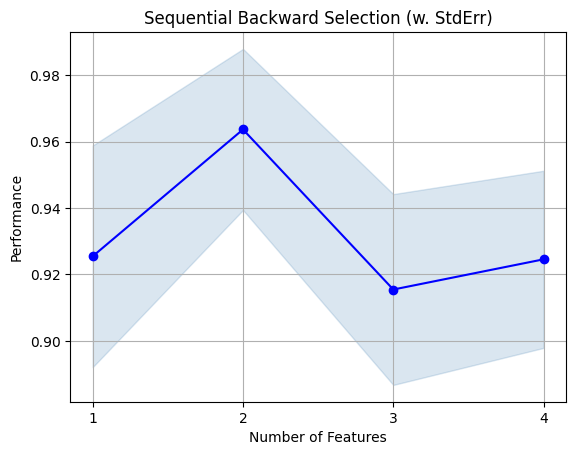

In [208]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Créer une instance de modèle Logistic Regression
logistic_regression = LogisticRegression()

# Créer un objet SequentialFeatureSelector
sfs = SFS(logistic_regression,
          k_features=(1, X_train.shape[1]),  # Utilisez X_train.shape[1] comme valeur maximale
          forward=False,# icie en mentionne false pour faire le bacward
          floating=False,
          scoring='accuracy',
          cv=10)

# Effectuer la sélection des caractéristiques sur les données d'entraînement
sfs = sfs.fit(X_train, y_train)

# Afficher les résultats de la sélection des caractéristiques
print('Meilleur sous-ensemble (indices):', sfs.k_feature_idx_)
best_feature_names = [iris_df.columns[i] for i in sfs.k_feature_idx_]
print('Meilleur sous-ensemble (noms correspondants):', best_feature_names)
print("\n")

# Tracer la performance de la sélection des caractéristiques
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

##### **e.2) La prédiction avec les variables selectionnées par la methode Backward SFS**

In [209]:
# Sélectionner uniquement les colonnes 2 et 3 (3ème et 4ème colonnes)
selected_columns = [2, 3] ## les colonnes selctionnées
X_train_selected = X_train[:, selected_columns]
X_test_selected=X_test[:, selected_columns]
# Classification avec régression logistique
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Afficher les performances de la RL
print(f"Accuracy (Logistic Regression): {lr_accuracy}")

# Afficher les rapports de classification pour la RL
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_predictions))

Accuracy (Logistic Regression): 1.0

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



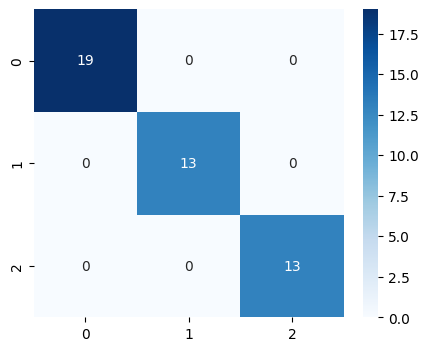

In [210]:
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# # Création du bar chart pour visualiser la variance
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues")
plt.show()

## **2. Stock Dataset (prediction de prix)**

In [233]:
df = df[df['company_name'] == 'APPLE']
df.head(5)

Date   Price    Open    High     Low         Vol.  Change %  \
0 2022-01-14  173.07  171.36  173.75  171.10   78730000.0      51.0   
1 2022-01-13  172.19  175.78  176.62  171.79   82270000.0    -190.0   
2 2022-01-12  175.53  176.12   67.28  174.82   72770000.0      26.0   
3 2022-01-11  175.08  172.32  175.18  170.82   75940000.0     168.0   
4 2022-01-10  172.19  169.08  172.50  168.17  103820000.0       1.0   

         coef  state  activity_in  activity_out company_name  
0  497.296390    6.0   544.567398    290.106619        APPLE  
1  889.874180    1.0   958.830431    116.604922        APPLE  
2   33.808154    1.0   651.171829    892.616525        APPLE  
3   76.642932    2.0   212.135502    539.260305        APPLE  
4  802.343154    9.0   139.144297    399.070275        APPLE

### **2.1) Preprocessing**

#### **a) Extraction de year, month, and day vers des colonnes séparées**

In [245]:
df_normalized = df.copy()
df_normalized['Year'] = df_normalized['Date'].dt.year
df_normalized['Month'] = df_normalized['Date'].dt.month
df_normalized['Day'] = df_normalized['Date'].dt.day

# Now, drop the original 'Date' column
df_normalized = df_normalized.drop('Date', axis=1)

df_normalized.head(5)

Price    Open    High     Low         Vol.  Change %        coef  state  \
0  173.07  171.36  173.75  171.10   78730000.0      51.0  497.296390    6.0   
1  172.19  175.78  176.62  171.79   82270000.0    -190.0  889.874180    1.0   
2  175.53  176.12   67.28  174.82   72770000.0      26.0   33.808154    1.0   
3  175.08  172.32  175.18  170.82   75940000.0     168.0   76.642932    2.0   
4  172.19  169.08  172.50  168.17  103820000.0       1.0  802.343154    9.0   

   activity_in  activity_out company_name  Year  Month  Day  
0   544.567398    290.106619        APPLE  2022      1   14  
1   958.830431    116.604922        APPLE  2022      1   13  
2   651.171829    892.616525        APPLE  2022      1   12  
3   212.135502    539.260305        APPLE  2022      1   11  
4   139.144297    399.070275        APPLE  2022      1   10

#### **b) Label encoding des campany_name**

In [246]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'company_name' column
df_normalized['company_name_encoded'] = label_encoder.fit_transform(df_normalized['company_name'])

# Now, drop the original 'company_name' column
df_normalized = df_normalized.drop('company_name', axis=1)

df_normalized.head(5)

Price    Open    High     Low         Vol.  Change %        coef  state  \
0  173.07  171.36  173.75  171.10   78730000.0      51.0  497.296390    6.0   
1  172.19  175.78  176.62  171.79   82270000.0    -190.0  889.874180    1.0   
2  175.53  176.12   67.28  174.82   72770000.0      26.0   33.808154    1.0   
3  175.08  172.32  175.18  170.82   75940000.0     168.0   76.642932    2.0   
4  172.19  169.08  172.50  168.17  103820000.0       1.0  802.343154    9.0   

   activity_in  activity_out  Year  Month  Day  company_name_encoded  
0   544.567398    290.106619  2022      1   14                     0  
1   958.830431    116.604922  2022      1   13                     0  
2   651.171829    892.616525  2022      1   12                     0  
3   212.135502    539.260305  2022      1   11                     0  
4   139.144297    399.070275  2022      1   10                     0

#### **c) La  normalization de dataset**

In [247]:
# Exclure la colonne 'Price' la date et compagny_name pour la normalisation
features_to_normalize = df_normalized.columns.difference(['Year','Month','Day','Price','company_name_encoded'])

# Créez un MinMaxScaler
scaler = MinMaxScaler()

df_normalized = df_normalized.drop('Year', axis=1)
df_normalized = df_normalized.drop('Month', axis=1)
df_normalized = df_normalized.drop('Day', axis=1)
df_normalized = df_normalized.drop('company_name_encoded', axis=1)

# Appliquez la normalisation aux colonnes sélectionnées
df_normalized[features_to_normalize] = scaler.fit_transform(df_normalized[features_to_normalize])

# Affichez le DataFrame normalisé
print("Data normaliseé \n")
df_normalized.head(4)

Data normaliseé 



Price      Open      High       Low      Vol.  Change %      coef  \
0  173.07  0.923145  0.937274  0.944158  0.098431  0.538245  0.495212   
1  172.19  0.953287  0.956863  0.948963  0.107598  0.441224  0.889523   
2  175.53  0.955606  0.210566  0.970060  0.082997  0.528180  0.029678   
3  175.08  0.929692  0.947034  0.942209  0.091206  0.585346  0.072701   

      state  activity_in  activity_out  
0  0.666667     0.544304      0.288978  
1  0.111111     0.958883      0.115010  
2  0.111111     0.650990      0.893105  
3  0.222222     0.211618      0.538800

### **2.2) Avant la selection des caracteristiques**

**Répartition de dataset train et test**

In [248]:
from sklearn.model_selection import train_test_split

#avec tout les variable sauf Price
cols = [col for col in df_normalized.columns if col != 'Price']

X = df_normalized[cols]
y = df_normalized['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [249]:
X_train

Open      High       Low      Vol.  Change %      coef     state  \
336  0.540371  0.543103  0.532934  0.296017  0.398953  0.280497  0.111111   
567  0.152414  0.152754  0.158752  0.094339  0.501610  0.384163  1.000000   
935  0.038257  0.040066  0.040524  0.449451  0.611111  0.665373  0.111111   
249  0.667008  0.704662  0.682983  0.206676  0.665459  0.523337  0.777778   
558  0.179010  0.177531  0.175045  0.264450  0.424718  0.563269  0.777778   
..        ...       ...       ...       ...       ...       ...       ...   
458  0.157529  0.173981  0.160702  0.639139  0.921498  0.970661  0.333333   
330  0.471768  0.503856  0.483916  0.328931  0.559179  0.141514  0.444444   
466  0.190944  0.212067  0.184515  0.978221  0.119968  0.900948  0.111111   
121  0.765548  0.773940  0.781576  0.082116  0.529388  0.762047  1.000000   
860  0.115589  0.116170  0.120944  0.189766  0.576490  0.667645  0.222222   

     activity_in  activity_out  
336     0.312971      0.933299  
567     0.512435      0.994996  
935     0.208255      0.916295  
249     0.471514      0.708326  
558     0.760742      0.956359  
..           ...           ...  
458     0.454808      0.821507  
330     0.519725      0.038972  
466     0.368173      0.559179  
121     0.160960      0.198602  
860     0.107702      0.913276  

[771 rows x 9 columns]

#### **a) La pédiction avec SVR(Support vector Machine)**

**Importation du Modèle**

In [251]:
from sklearn.svm import SVR
SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_test)

**Calculer l'erreur**

In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 132.45864787727672
Root Mean Squared Error : 11.509068071624075
Mean Absolute Error : 6.891857947208083
Coefficient de Détermination : 0.9195262828788018


#### **b) La pédiction avec Linear regression**

In [253]:
from sklearn.linear_model import LinearRegression

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)

Linear Regression Train Score is :  0.9820770678044551
Linear Regression Test Score is :  0.9863572236855793


**calculate Error**

In [254]:
# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 22.455824939448114
Root Mean Squared Error : 4.738757742219802
Mean Absolute Error : 1.3766374540228583
Coefficient de Détermination : 0.9863572236855793


**Extraire les features names**

In [255]:
feature_names = X_train.columns
feature_names[0]
Feature_names=[]
for i in range (len(feature_names)):
    Feature_names=Feature_names+[feature_names[i]]
Feature_names

['Open',
 'High',
 'Low',
 'Vol.',
 'Change %',
 'coef',
 'state',
 'activity_in',
 'activity_out']

#### **La performance des algorithmes de rédiction avant la sélection des caractéristiques**

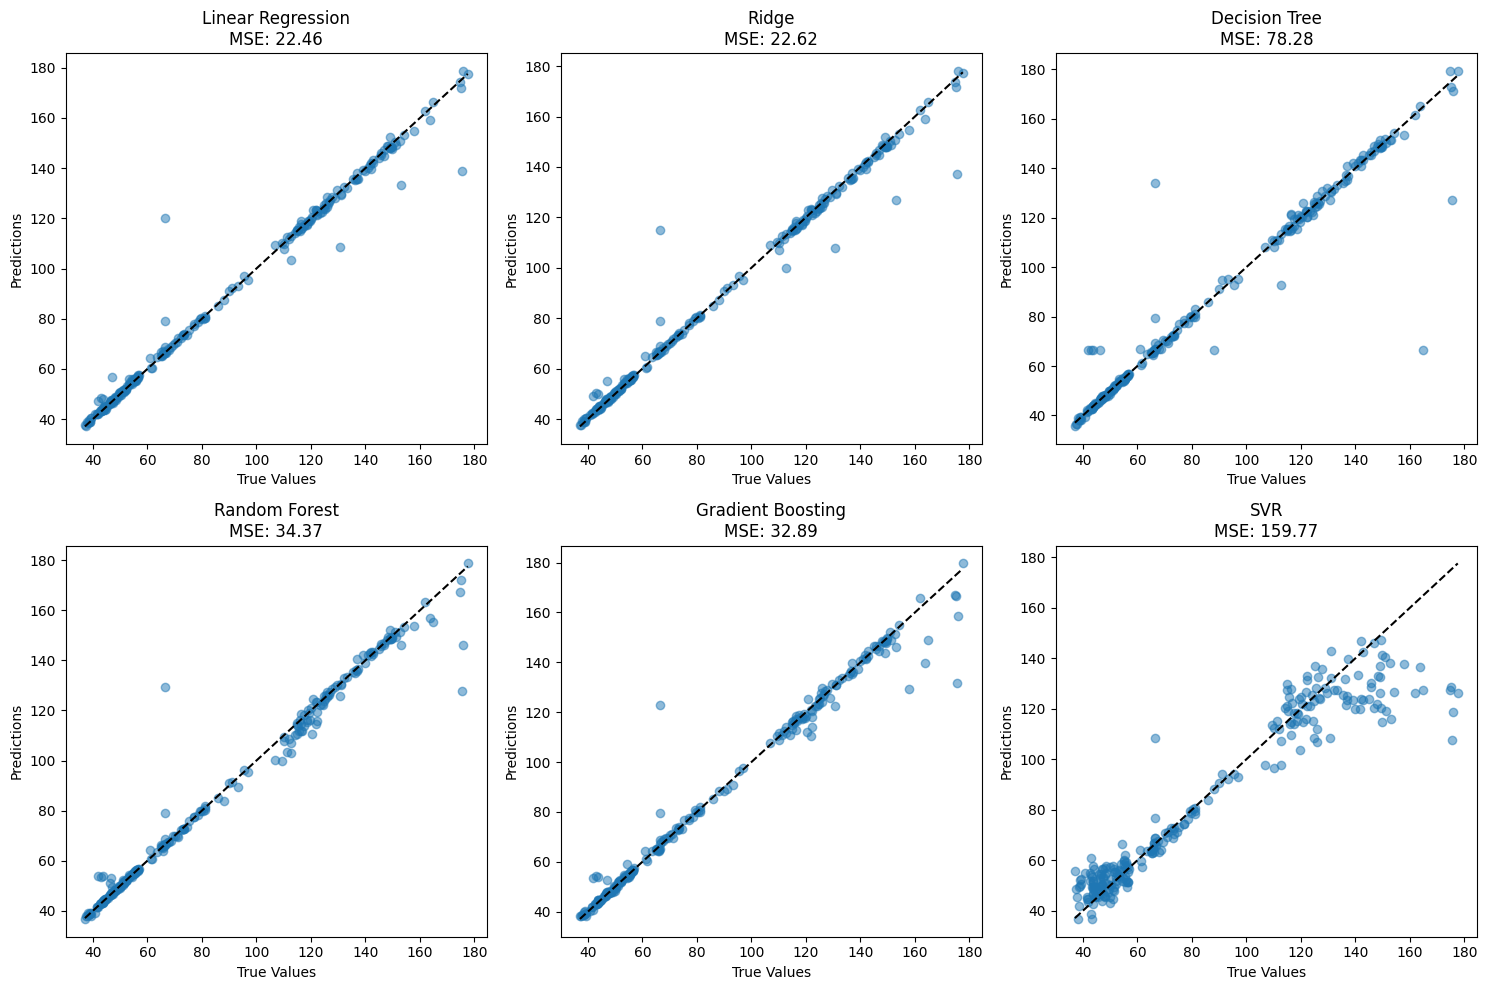

In [250]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialiser les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Entraîner les modèles et faire des prédictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Visualisation
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name}\nMSE: {mean_squared_error(y_test, pred):.2f}')
plt.tight_layout()
plt.show()

### **2.3) La selection des caracteristiques**

#### **a)** Méthode de Features Selection : **La variance**

##### **a.1) Application de la VarianceThreshold**

In [256]:
# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_train)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)

('Open', 0.07897648324262371)
('High', 0.08089919113550212)
('Low', 0.08030031433293501)
('Vol.', 0.022599866357895005)
('Change %', 0.007070845613856678)
('coef', 0.08436627081407441)
('state', 0.10127502088745229)
('activity_in', 0.08377923978078027)
('activity_out', 0.08627494127229564)


##### **a.2) Visualisation de la variance**

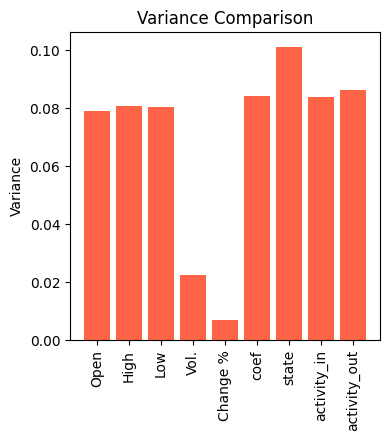

In [257]:
# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

##### **a.3) La prediction Avac les caracteristiques selctionnées par la methode de la variance**

**SVR**

In [258]:
cols=['Open','High','Low','coef','state','activity_in','activity_out']
X_trainV = X_train[cols]
X_testV = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainV, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testV)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 135.80793840740077
Root Mean Squared Error : 11.653666307536044
Mean Absolute Error : 6.881828459898631
Coefficient de Détermination : 0.9174914602152968


**Linear Regression**

In [259]:
cols=['Open','High','Low','coef','state','activity_in','activity_out']
X_trainV = X_train[cols]
X_testV = X_test[cols]

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainV, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testV, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testV)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.985719458557909
Mean Squared Error : 23.505577697199683
Root Mean Squared Error : 4.848255118823646
Mean Absolute Error : 1.558307541879001
Coefficient de Détermination : 0.985719458557909


#### **b)** Méthode de Features Selection : **Critère de l’information mutuelle**

##### **b.1) Application de la mutual_info_regression**

In [260]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_regression
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_regression(X_train, y_train, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

('Open', 2.966723195647857)
('High', 3.4403088382351985)
('Low', 3.480795233990832)
('Vol.', 0.2101663926162467)
('Change %', 0.0244097793521183)
('coef', 0.0)
('state', 0.003658515477289015)
('activity_in', 0.0)
('activity_out', 0.029531750207786978)


##### **b.2) Visualisation de  mutual information scores**

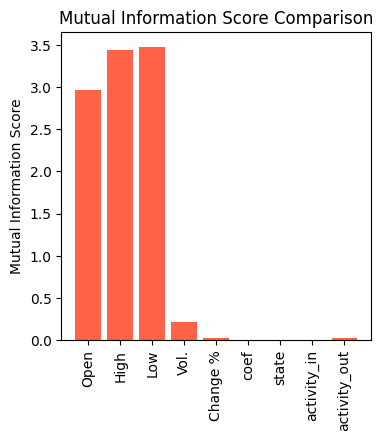

In [261]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

##### **b.3) La prédiction Avec les caracteristiques selectionnées par la methode mutual information**

**SVR**

In [262]:
cols=['Open', 'High', 'Low']
X_trainM = X_train[cols]
X_testM = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainM, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 45.2386289335571
Root Mean Squared Error : 6.725966765719044
Mean Absolute Error : 2.242797664193615
Coefficient de Détermination : 0.9725157950342141


**Linear Regression**

In [263]:
cols=['Open', 'High', 'Low']
X_trainM = X_train[cols]
X_testM = X_test[cols]

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainM, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testM, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.9858981799127012
Mean Squared Error : 23.21140476907555
Root Mean Squared Error : 4.817821579207303
Mean Absolute Error : 1.4822305744959317
Coefficient de Détermination : 0.9858981799127012


#### **c)** Méthode de Features Selection : **F-test (fisher)**

##### **c.1) Application de la f_regression**

In [264]:
from sklearn.feature_selection import f_regression
f_value = f_regression(X_train, y_train)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

('Open', 34145.863401148374)
('High', 30949.469877659594)
('Low', 25142.23390019029)
('Vol.', 53.83680890295678)
('Change %', 4.888476517383117)
('coef', 0.8332828910351292)
('state', 1.22748025836949)
('activity_in', 0.024127204431705195)
('activity_out', 0.3297423430326132)


##### **c.2) Visualisation des F-scores**

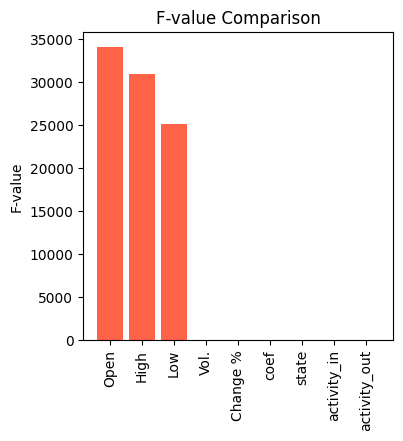

In [265]:
plt.figure(figsize=(4, 4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

##### **c.3) La prédiction Avec les caracteristiques selectionnées par la méthode F-test (fisher)**

**SVR**

In [266]:
cols=['Open', 'High', 'Low']
X_trainM = X_train[cols]
X_testM = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainM, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 45.2386289335571
Root Mean Squared Error : 6.725966765719044
Mean Absolute Error : 2.242797664193615
Coefficient de Détermination : 0.9725157950342141


**Linear regression**

In [267]:
cols=['Open', 'High', 'Low']
X_trainM = X_train[cols]
X_testM = X_test[cols]

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainM, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testM, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.9858981799127012
Mean Squared Error : 23.21140476907555
Root Mean Squared Error : 4.817821579207303
Mean Absolute Error : 1.4822305744959317
Coefficient de Détermination : 0.9858981799127012


#### **d)** Méthode de Features Selection : **Forward/Sequential Features selction SFS**

##### **d.1) Application de l'algorithme SFS Forward**

Best subset (indices): (0, 1)
Best subset (corresponding names): ('Open', 'High')


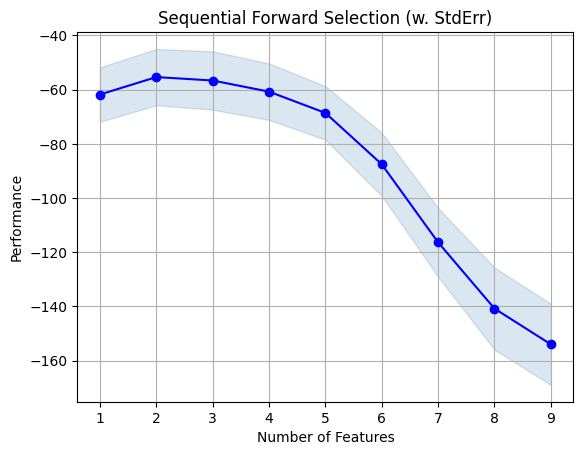

In [268]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = SFS(SVR(),
          k_features=(1, X_train.shape[1]),
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train,y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

##### **d.2) La prédiction Avec les caracteristiques selectionnées par la méthode Forward SFS**

**SVR**

In [269]:
cols = ['Open', 'High']
X_trainM = X_train[cols]
X_testM = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainM, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 52.33869885166404
Root Mean Squared Error : 7.234548973617087
Mean Absolute Error : 2.1575087464569878
Coefficient de Détermination : 0.9682022298024459


**Linear Regression**

In [270]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainM, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testM, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.9805630252830002
Mean Squared Error : 31.992996992559902
Root Mean Squared Error : 5.65623523136723
Mean Absolute Error : 1.5271562921644193
Coefficient de Détermination : 0.9805630252830002


#### **e)** Méthode de Features Selection : **Backward/Sequential Features selction SFS**

##### **e.1) Application de l'algorithme SFS Backward**

Best subset (indices): (0, 1)
Best subset (corresponding names): ('Open', 'High')


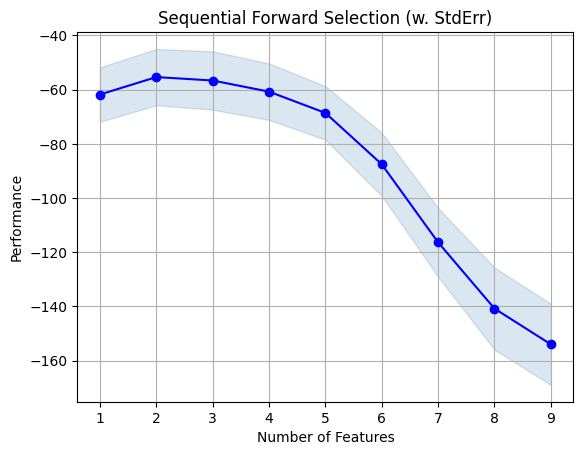

In [271]:
sfs = SFS(SVR(),
          k_features=(1, X_train.shape[1]),
          forward=False,
          floating=False,
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train,y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

##### **e.2) La prédiction Avec les caracteristiques selectionnées par la méthode Backward SFS**

**SVR**

In [272]:
cols = ['Open', 'High']
X_trainM = X_train[cols]
X_testM = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainM, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 52.33869885166404
Root Mean Squared Error : 7.234548973617087
Mean Absolute Error : 2.1575087464569878
Coefficient de Détermination : 0.9682022298024459


**Linear regression**

In [273]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainM, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testM, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.9805630252830002
Mean Squared Error : 31.992996992559902
Root Mean Squared Error : 5.65623523136723
Mean Absolute Error : 1.5271562921644193
Coefficient de Détermination : 0.9805630252830002


#### **f)** Méthode de Features Selection : **Random forest**

##### **f.1) Application de l'algorithme Random forest**

In [274]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest classifier
rfc = RandomForestRegressor(random_state=0) # Use gini criterion to define feature importance

# Train the classifier
rfc.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_names, rfc.feature_importances_):
    print(feature)

('Open', 0.5699719476312699)
('High', 0.26666335853456224)
('Low', 0.15582844975282145)
('Vol.', 0.0032944254892845475)
('Change %', 0.0009930713148959172)
('coef', 0.0016488874095432387)
('state', 0.00031058260503420677)
('activity_in', 0.000842243288505516)
('activity_out', 0.00044703397408297303)


##### **f.2) Visualisation des scores**

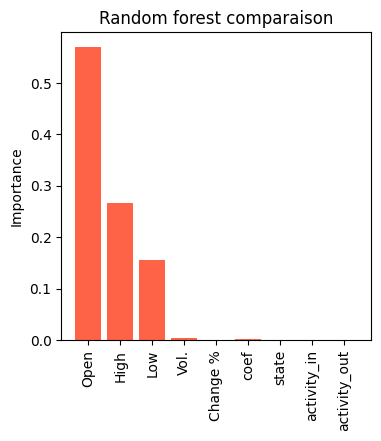

In [275]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar( x=feature_names,height=rfc.feature_importances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Random forest comparaison')
plt.show()

##### **f.3) La prédiction Avec les caracteristiques selectionnées par la méthode Random Forest**

**SVR**

In [276]:
cols=['Open', 'High', 'Low']
X_trainM = X_train[cols]
X_testM = X_test[cols]

SVRModel = SVR(C = 1.5 ,epsilon=0.) # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_trainM, y_train)
#Calculating Prediction
y_pred = SVRModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Mean Squared Error : 45.2386289335571
Root Mean Squared Error : 6.725966765719044
Mean Absolute Error : 2.242797664193615
Coefficient de Détermination : 0.9725157950342141


**Linear Regression**

In [277]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_trainM, y_train)

#Calculating Details
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_testM, y_test))
print("=======================================================")

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_testM)

# Erreur Quadratique Moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Racine de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
# Erreur Absolue Moyenne (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Coefficient de Détermination (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("Coefficient de Détermination :", r2)

Linear Regression Test Score is :  0.9858981799127012
Mean Squared Error : 23.21140476907555
Root Mean Squared Error : 4.817821579207303
Mean Absolute Error : 1.4822305744959317
Coefficient de Détermination : 0.9858981799127012


# **Matrice de confusion du (des) meilleure(s) méthode(s)**


**La performance des algorithmes de rédiction après la sélection des caractéristiques**

Après avoir évalué les modèles de prédiction en utilisant les divers ensembles de variables choisis par les méthodes de sélection de caractéristiques, une nette amélioration des performances a été observée, notamment pour le modèle SVR.

1.  l’Algorithme le plus performant : **Test de Fisher** et **Critère de l’information mutuelle**

2. les Caractéristiques les plus informatives : **Open, High et Low**

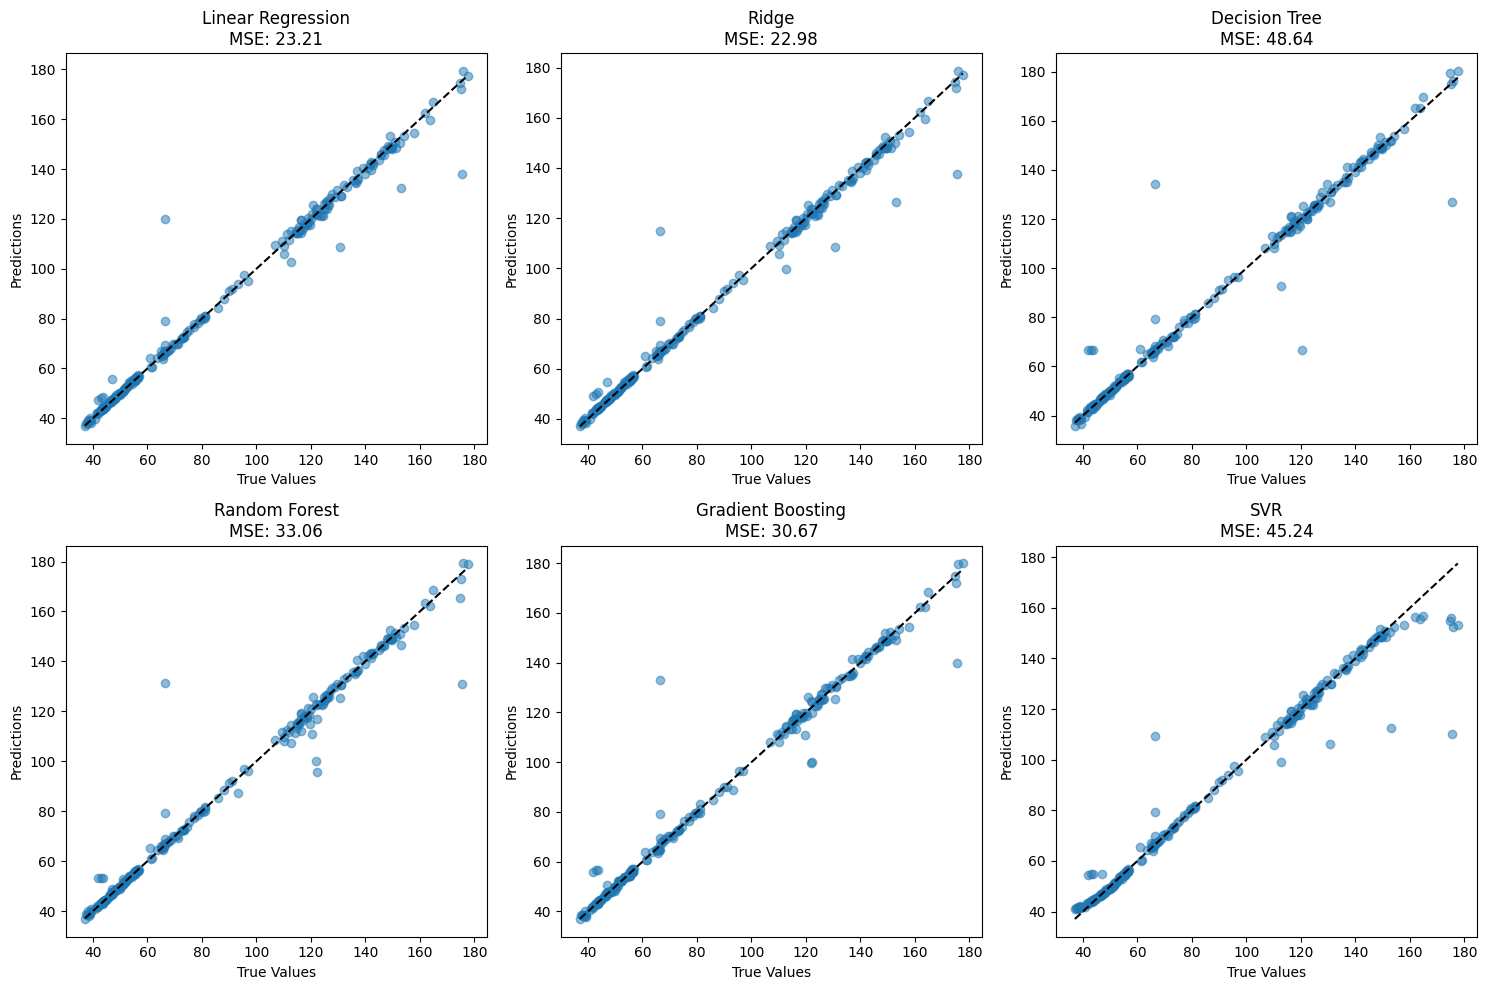

In [278]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

cols=['Open', 'High', 'Low'] #*** Critère de l’information mutuelle    fisher

X_trainL = X_train[cols]
X_testL = X_test[cols]

# Initialiser les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(C = 1.5 ,epsilon=0.)
}

# Entraîner les modèles et faire des prédictions
predictions = {}
for name, model in models.items():
    model.fit(X_trainL, y_train)
    predictions[name] = model.predict(X_testL)

# Visualisation
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name}\nMSE: {mean_squared_error(y_test, pred):.2f}')
plt.tight_layout()
plt.show()